# Machine Learning - Presentation - Team 6

### Team Members - 
##### (1) Ganesh Vasant Kini Kulai
##### (2) Abhishek Kumar Singh
##### (3) Dinu Thomas
##### (4) Charithra Chandrashekar

### Topic - Prediction of bike rental service in a large metropolitan city

![Image](https://www.icebike.org/wp-content/uploads/2015/08/bike-rental-shop-14716686.jpg)

## PROBLEM STATEMENT:

With a continuously developing world, bike rentals have become a very popular mode of commmute, for both leisure and general travel purposes. However, the usage and availability of bikes at various rental services and street side kiosks are affected by several parameters driving the demand and usability of bikes in general, like climate, time of day, etc. So, it is important for rental companies to predict the demand for bike rental services, which helps a lot in fulfilling the demand and make adequate supplies available at the most profitable locations and time.

The problem here is to predict the number of bike rental pickups in a day depending on relevant variables that impact the usability of a bike and affect the number of orders. Here the predicted or target variable is numeric, so we will try to solve it as a Linear Regression Problem.

### Importing The Libraries

In [494]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import optimize
from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# import function to perform linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from statistics import mean

from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge
from scipy.stats import pearsonr

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

import datetime

# 1 Exploratory Data Analysis

In [495]:
bikeData = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

In [496]:
bikeData.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [497]:
bikeData.describe(include='object')

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     01/12/2017  Summer  No Holiday             Yes
freq            24    2208        8328            8465

In [498]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [499]:
bikeData['Hour'].describe()

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64

In [500]:
bikeData.shape

(8760, 14)

<a id="outliers"></a>
## 1.1 Outlier Analysis and Treatment

**Checking the outliers in all the variables and treat them using appropriate techniques.**

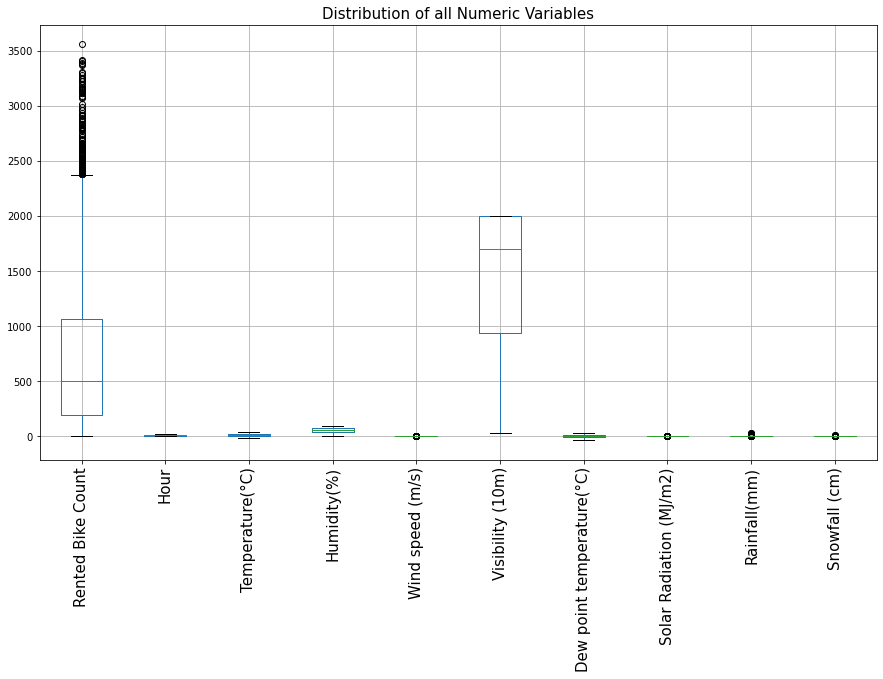

In [501]:
plt.figure(figsize=(15,8))
# plot a boxplot to visualize the outliers in all the numeric variables
bikeData.boxplot()

# set plot label
# set text size using 'fontsize'

plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variable 'Rented Bike Count' has a quite large range as compared to the other variables.**

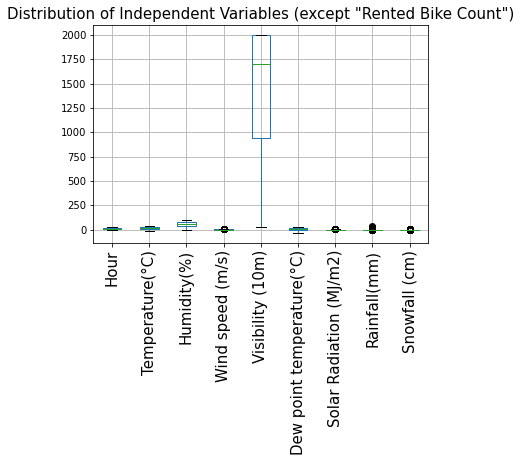

In [502]:
# plot boxplots of all the numeric variables except 'Rented Bike Count' 
# use 'iloc[]' to select the variables except 'Rented Bike Count' 
bikeData.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables (except "Rented Bike Count")', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Plot the boxplot of an dependent variable 'Rented Bike Count'.**

**Interpretation:** From the above plots, we notice that the variable Rented Bike Count has points above the upper extreme - these points are outliers in the data. 



In [503]:
#Let us use the IQR method to remove the outliers.

In [504]:
bikeData.shape

(8760, 14)

In [505]:
#**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

<a id="null"></a>
## 1.2  Missing Value Analysis and Treatment

**Checking the presence of missing values in the data and treat them.**

In [506]:
# sorting the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = bikeData.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (bikeData.isnull().sum()*100/bikeData.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Functioning Day                0                           0.0
Holiday                        0                           0.0
Seasons                        0                           0.0
Snowfall (cm)                  0                           0.0
Rainfall(mm)                   0                           0.0
Solar Radiation (MJ/m2)        0                           0.0
Dew point temperature(°C)      0                           0.0
Visibility (10m)               0                           0.0
Wind speed (m/s)               0                           0.0
Humidity(%)                    0                           0.0
Temperature(°C)                0                           0.0
Hour                           0                           0.0
Rented Bike Count              0                           0.0
Date                           0                           0.0

**Interpretation:** The above output shows that there are no missing values in the data.

<a id="std"></a>
## 1.3 Remove Variables with Low Standard Deviation

#### Check the standard deviation of all the variables

In [507]:
# std() returns the standard deviation of each variable 
bikeData.std()

Rented Bike Count            644.997468
Hour                           6.922582
Temperature(°C)               11.944825
Humidity(%)                   20.362413
Wind speed (m/s)               1.036300
Visibility (10m)             608.298712
Dew point temperature(°C)     13.060369
Solar Radiation (MJ/m2)        0.868746
Rainfall(mm)                   1.128193
Snowfall (cm)                  0.436746
dtype: float64

**Interpretation:** As we can see that the variable 'Rainfall(mm)' and 'Snowfall (cm)' has a standard deviation of zero and thus, we keep an eye on it and check this deviation after normalising.

## 1.4 Categorical Variables

### 1.4.1 Converting Hour variable into 5 buckets

In [508]:
hour_avg = bikeData.groupby('Hour')['Rented Bike Count'].mean().reset_index()
hour_avg.head(5)

Hour  Rented Bike Count
0     0         541.460274
1     1         426.183562
2     2         301.630137
3     3         203.331507
4     4         132.591781

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

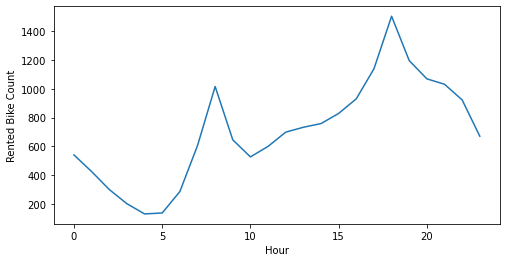

In [509]:
plt.figure(figsize = (8,4))
sns.lineplot(x=hour_avg['Hour'],y=hour_avg['Rented Bike Count'])

The timeseries graph on demand on a day shows a non linear curve. There are some peak periods. So treating hour as a numeric variable can lead to some problems in the model.

Keeping the peaks in mind, lets create some demand buckets.

#### We have made some utility functions for conversions and repetitions

#### 1. Convert hour into 4 buckets -using utility functions

In [510]:
def convertHourBuckets(hour):
    hour = int(hour)
    if hour < 5:
        return 'early_morning'
    elif hour < 9:
        return 'morning'
    elif hour < 19:
        return 'office_hours'
    else:
        return 'night'

#### 2. Convert a date in the format 12/09/2018 to corresponding day = "Wednesday"

In [511]:

def convertDate2Day(date):
    if datetime.datetime.strptime(date, '%d/%m/%Y'):
        return datetime.datetime.strptime(date, '%d/%m/%Y').strftime('%A')
    elif datetime.datetime.strptime(date, '%d/%m/%Y'):
        return datetime.datetime.strptime(date, '%d/%m/%Y').strftime('%A')
# Convert a date in the format 12/09/2018 to weekday or weekend if weekend returns 1
# did not consider the middle east standard, as the data is from Korea
def convertDate2Weekend(date):
    day = convertDate2Day(date)
    if day in ["Sunday","Saturday"]:
        return 1
    return 0

In [512]:
#Convert the Hours into 5 buckets
bikeData['Hour_bkt'] = bikeData['Hour'].apply(lambda x : convertHourBuckets(x))

In [513]:
#bikeData['Date'] = bikeData['Date'].apply(lambda x : convertDate2Day(x))

In [514]:
#Convert the Hours into 4 buckets
bikeData['Weekend'] = bikeData['Date'].apply(lambda x : convertDate2Weekend(x))

In [515]:
bikeData.Hour_bkt.unique()

array(['early_morning', 'morning', 'office_hours', 'night'], dtype=object)

## 1.4.2 n-1 dummy encoding

In [516]:
bikeCatData_enc = pd.get_dummies(bikeData[['Seasons','Hour_bkt','Functioning Day','Holiday']],'',drop_first=True)
bikeCatData_enc.rename(columns={'_Yes':'FunctionDay'},inplace=True)
bikeCatData_enc.head(2)

_Spring  _Summer  _Winter  _morning  _night  _office_hours  FunctionDay  \
0        0        0        1         0       0              0            1   
1        0        0        1         0       0              0            1   

   _No Holiday  
0            1  
1            1

In [517]:
bikeData_num = bikeData.select_dtypes(include=[np.number])
#bikeData_num = bikeData_num.drop('Hour',axis = 1)

In [518]:
bikeData_feats = pd.concat([bikeData_num,bikeCatData_enc], axis=1)

In [519]:
bikeData_feats.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)      Weekend  \
count              8760.000000   8760.000000    8760.000000  8760.000000   
mean                  0.569111      0.148687       0.075068     0.284932   
std                   0.868746      1.128193       0.436746     0.451408   
min                   0.000000      0.000000       0.000000     0.000000   
25%                   0.000000      0.000000       0.000000     0.000000   
50%                   0.010000      0.000000       0.000000     0.000000   
75%                   0.930000      0.000000       0.000000     1.000000   
max                   3.520000     35.000000       8.800000     1.000000   

           _Spring      _Summer      _Winter     _morning       _night  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean      0.252055     0.252055     0.246575     0.166667     0.208333   
std       0.434217     0.434217     0.431042     0.372699     0.406140   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       _office_hours  FunctionDay  _No Holiday  
count    8760.000000  8760.000000  8760.000000  
mean        0.416667     0.966324     0.950685  
std         0.493035     0.180404     0.216537  
min         0.000000     0.000000     0.000000  
25%         0.000000     1.000000     1.000000  
50%         0.000000     1.000000     1.000000  
75%         1.000000     1.000000     1.000000  
max         1.000000     1.000000     1.000000

In [520]:
bikeData.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day       Hour_bkt  Weekend  
0             Yes  early_morning        0  
1             Yes  early_morning        0  
2             Yes  early_morning        0  
3             Yes  early_morning        0  
4             Yes  early_morning        0

#### Scaling all together

In [521]:
def standardScale_dataframe(data,name_suffix = "_std"):
    std_scale = StandardScaler()
    variables = []
    numeric_df = data.select_dtypes(include=[np.number])
    for param in numeric_df.columns:
        param_name = param.strip()+name_suffix
        variables.append(param_name)
        if param_name not in (numeric_df.columns):
            print(param_name)
            numeric_df[param_name] = std_scale.fit_transform(data[[param]]) # returns z-scores of the values of the attribute
    return numeric_df,variables


#### Model Performance logged into a dataframe for comparison

In [522]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    mape = np.abs((actual - predicted) / actual)
    mape = mape[~np.isnan(mape)]
    return ((mape) * 100).mean()

def model_metrics(result_df,model,name,remarks,datatype,y,y_hat):

    # calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for full model
    # use 'rsquared' to calculate R-squared value
    # use 'rsquared_adj' to calculate Adjusted R-squared value
    # use 'mean_squared_error' to calculate MSE
    # use 'rmse' to calculate RMSE
    # use 'mean_absolute_error' to calculate MAE
    # use the defined function 'mape' to calculate MAPE
    residuals = model.resid

    MLR_full_model_metrics = pd.Series({'Model_Name': name,
                                        'Data_Type': datatype,
                                        'Remarks': remarks,
                                        'R-squared': model.rsquared,
                                        'Adj. R-squared': model.rsquared_adj,
                                        'Durbin_Watson':statsmodels.stats.stattools.durbin_watson(residuals, axis=0),
                                        'JB_Prob':statsmodels.stats.stattools.jarque_bera(residuals, axis=0)[1],
                                        'Condition_No': model.condition_number,
                                        'MSE': mean_squared_error(y, y_hat),
                                        'RMSE': np.sqrt(mean_squared_error(y, y_hat)),
                                        'MAE': mean_absolute_error(y, y_hat),
                                       })

    
    # append the values to the result table
    result_df = result_df[(result_df.Model_Name != name)]
    result_df = result_df.append(MLR_full_model_metrics, ignore_index = True)

    return result_df

#### Utility function which wraps repeatedly used stuff for lr Models

In [523]:
def lr_model_experiment(df,target,exp_name,remarks,result_df,test_size=0.3,random_state = 123):
    X = df
    X = sm.add_constant(X)
    X = X.drop(target,axis = 1)
    print(X.columns)
    Y = df[target]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state) 
    lin_reg_model = sm.OLS(y_train,x_train).fit()
    
    y_test_predict = lin_reg_model.predict(x_test)

    out_df = model_metrics(result_df,lin_reg_model,exp_name+'_Test',remarks,"Test",y_test,y_test_predict)
    
    y_train_predict = lin_reg_model.predict(x_train)

    out_df = model_metrics(out_df,lin_reg_model,exp_name+'_Train',remarks,"Train",y_train,y_train_predict)
    return out_df,lin_reg_model,len(x_train)

<a id="after"></a>
## 2 Model Performance after Transformation

Transformation is a process that can be used to change the scale of the original data to get more accurate results. 

The transformed data can be used to satisfy the assumptions of linear regression, which were not satisfied earlier with the original data.

#### First, we build the model using the original data.

In [524]:
# create a copy of our dataframe 'bikeData'
bikeData_cons = bikeData_feats.copy()

#### Split the data into training and test sets.

In [525]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = bikeData_cons.drop('Rented Bike Count', axis = 1)

# dependent variable
y = bikeData_cons['Rented Bike Count']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7008, 19)
y_train (7008,)
X_test (1752, 19)
y_test (1752,)


**Build the multiple linear regression model using the OLS method.**

In [526]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     494.3
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:49:50   Log-Likelihood:                -52408.
No. Observations:                7008   AIC:                         1.049e+05
Df Residuals:                    6989   BIC:                         1.050e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Check the Assumption of Autocorrelation

We can check the correlation between the residuals using the `Durbin-Watson` test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.



**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 2.038). Thus, we conclude that there is no autocorrelation.

#### Check the Normality of Residuals

Check the normality of residuals before transforming the target variable

Skewness of the residuals:  0.8280434112374593


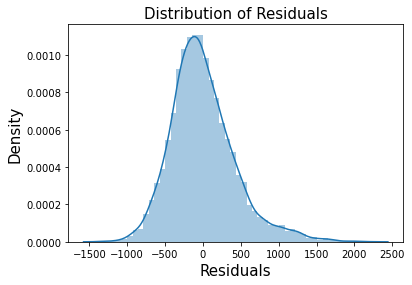

In [527]:
# plot a distplot for the residuals
sns.distplot(MLR_model.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model.resid.skew())

We can see that the distribution of the residuals is positively skewed. Thus, we will apply a log transformation to the target variable.

#### Interpretation of coefficient of skewness
If the value of:<br>
skewness < 0 implies negative skewness<br>
skewness > 0 implies positive skewness<br>
skewness = 0 implies no skewness (perfect normal distribution)<br>

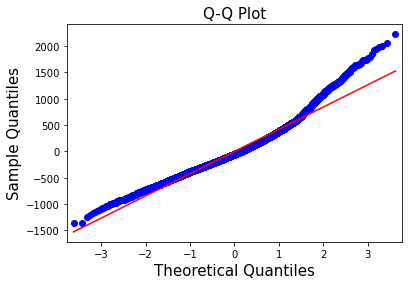

In [528]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation** Here we can see that the residuals are not normally distributed. The value of skewness is 1.3445. We will log transform the target variable and see if this reduces the skewness.

**Build the multiple linear regression model using the OLS method after transforming the target variable.**

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

<a id="sqr"></a>
### 2.1 Square Root Transformation

This transformation is used to reduce the skewness in the data. We can transform the target and/or independent variables by taking its square root. It can be used on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:28em'> <strong> sqrt(y) = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

Let us apply square root transformation on y_train. 

**Square Root Transformation**

In [529]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use square root transformation of y_train 
MLR_model_after_transform = sm.OLS(np.sqrt(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     749.8
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:49:54   Log-Likelihood:                -23854.
No. Observations:                7008   AIC:                         4.775e+04
Df Residuals:                    6989   BIC:                         4.788e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Interpretation** The value of R-Squared increases from 0.573 to 0.656 and the value of Adjusted R-Squared increases from 0.572 to 0.655. We don't see much increase in these values but we see that the residuals are more normally distributed. 

Check the normality of residuals after transforming the target variable

Skewness of the residuals:  0.1509499817401315


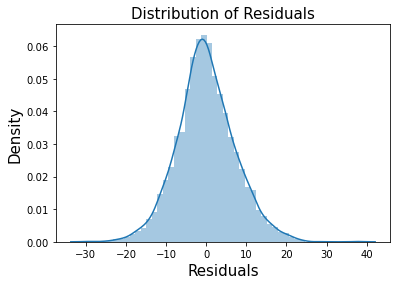

In [530]:
# plot a distplot for the residuals
sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

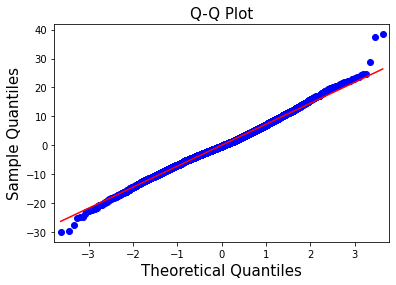

In [531]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [532]:
stats.shapiro(MLR_model_after_transform.resid)


ShapiroResult(statistic=0.9957027435302734, pvalue=1.4561375922313852e-13)

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

### 3. Multiple Linear Regression(MLR)

### 3.1.1 Understanding the Features Relations

<Figure size 1080x1080 with 0 Axes>

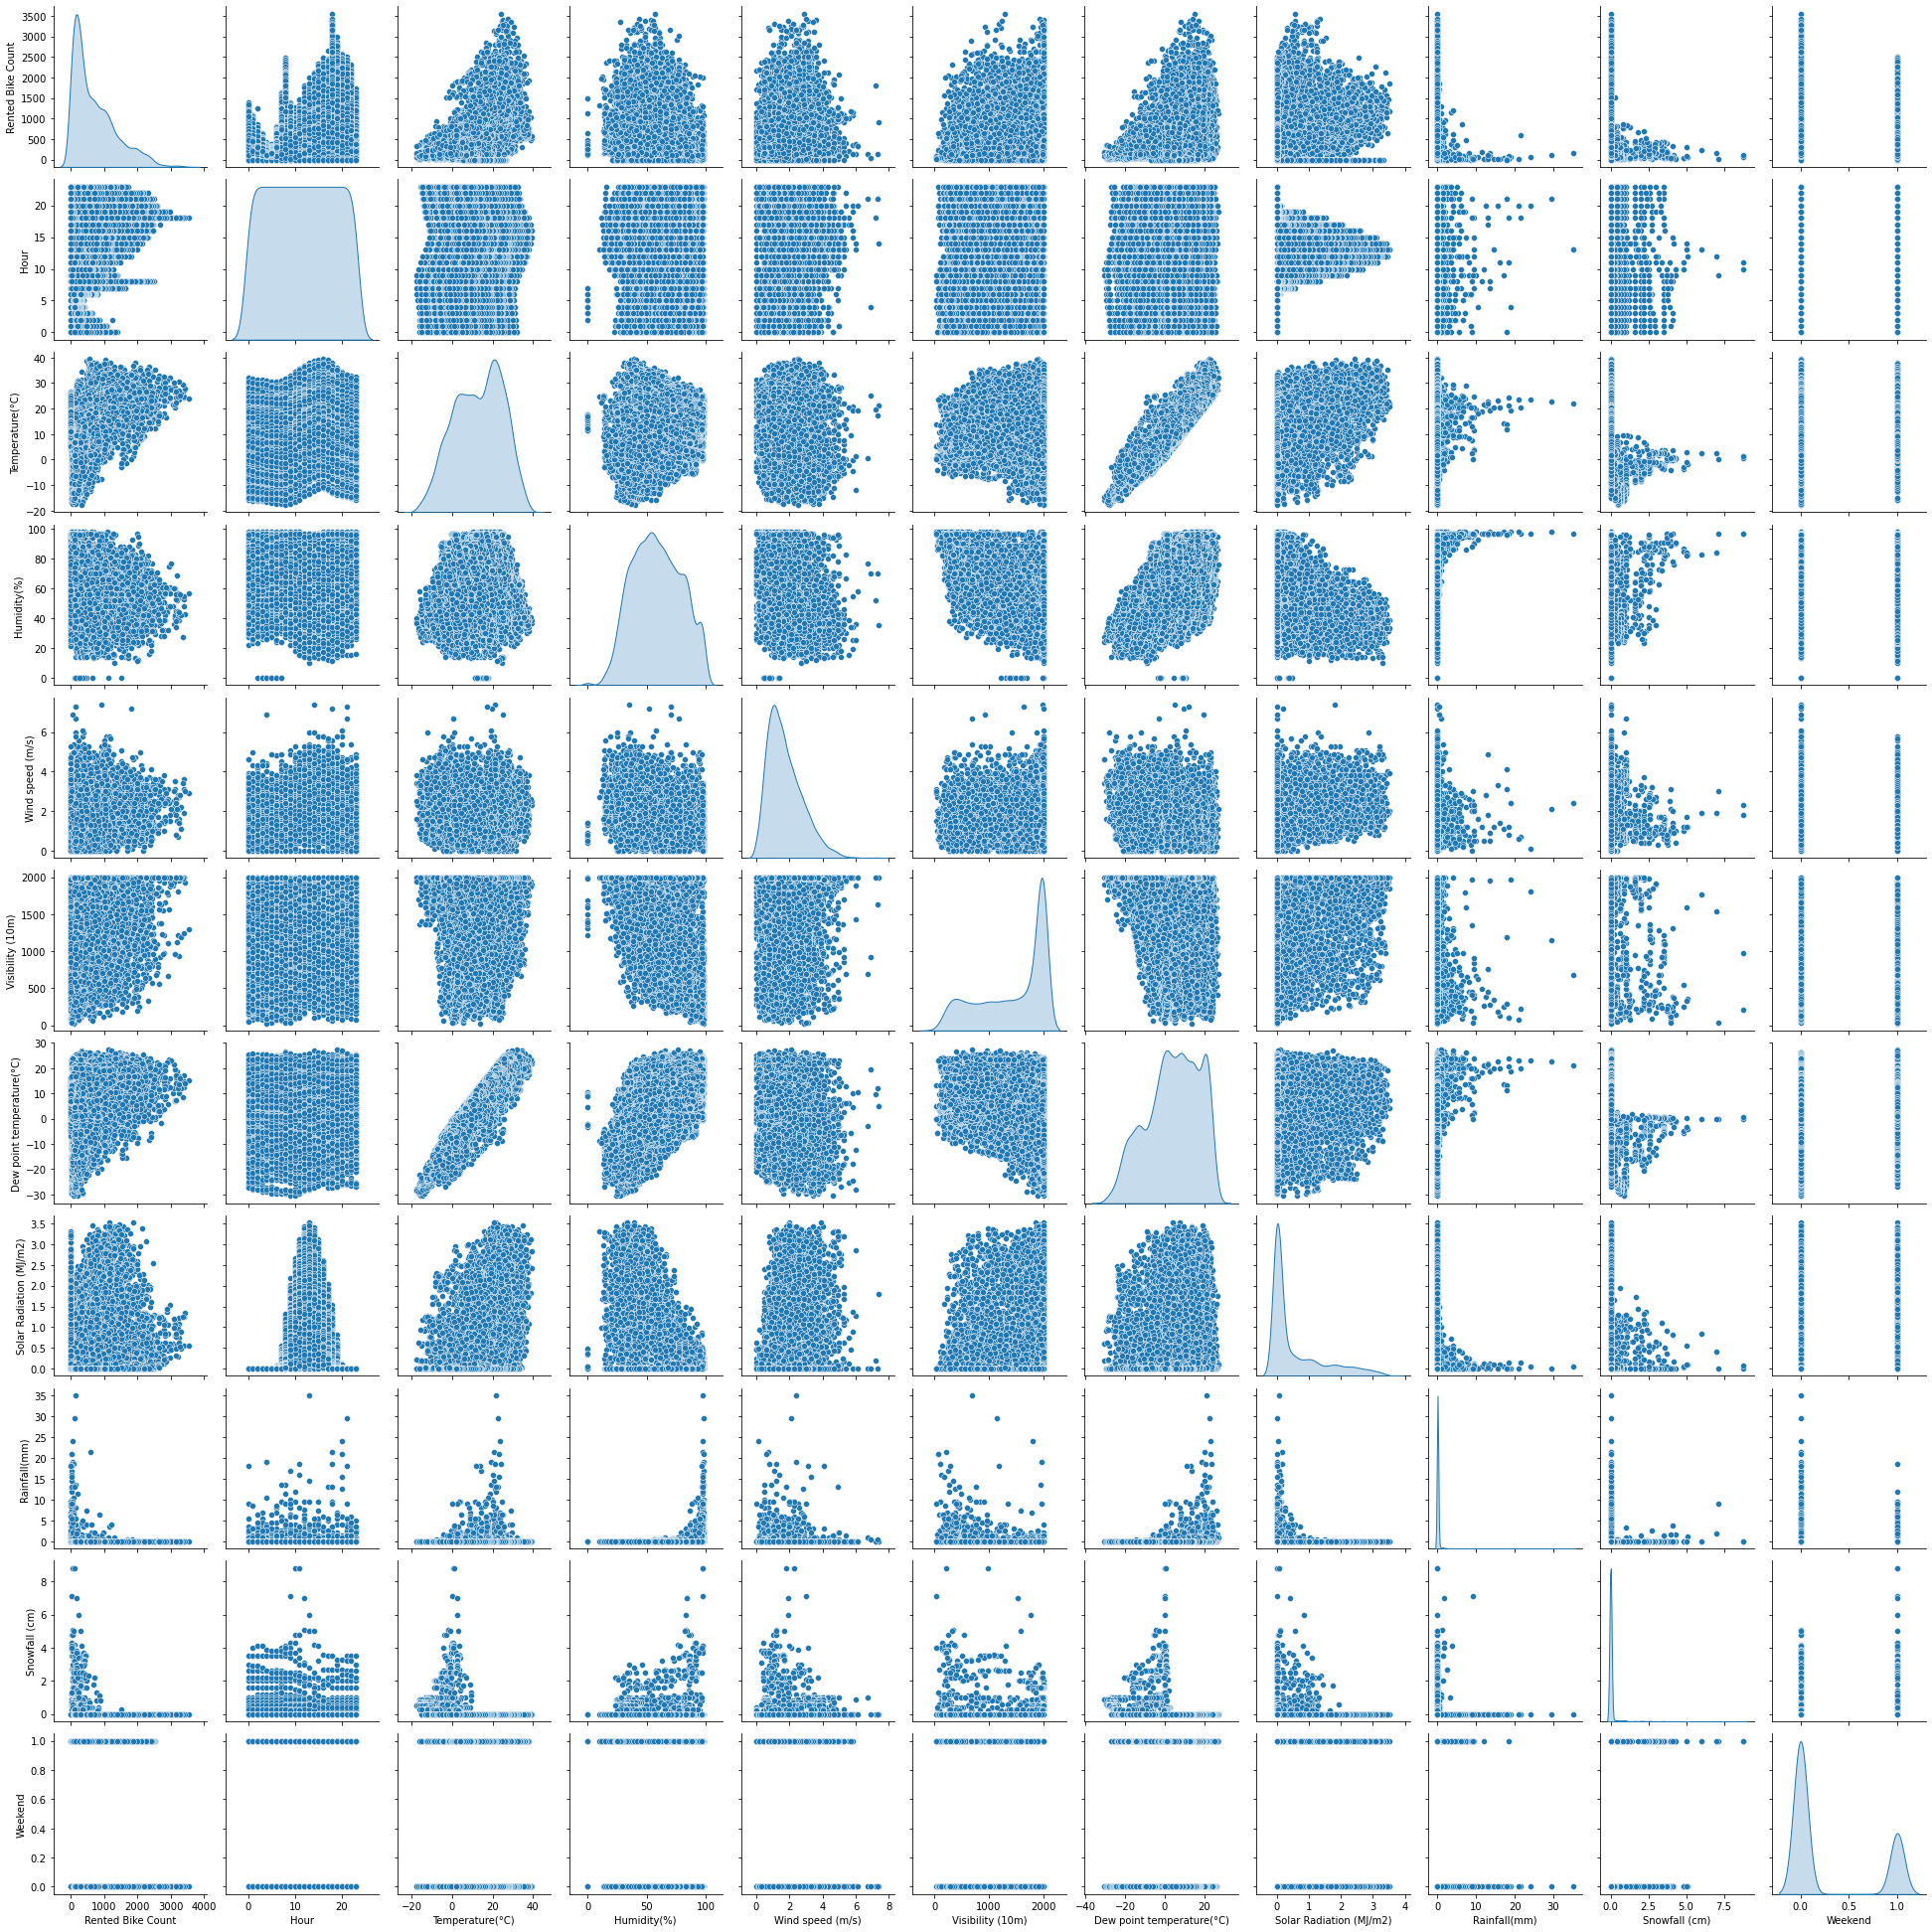

In [533]:
plt.figure(figsize=(15,15))
sns.pairplot(bikeData_num, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")

**Observation1: some linearity is identified between Temperature and Dew point temperature**

In [534]:
corr = bikeData_feats.corr()

<AxesSubplot:>

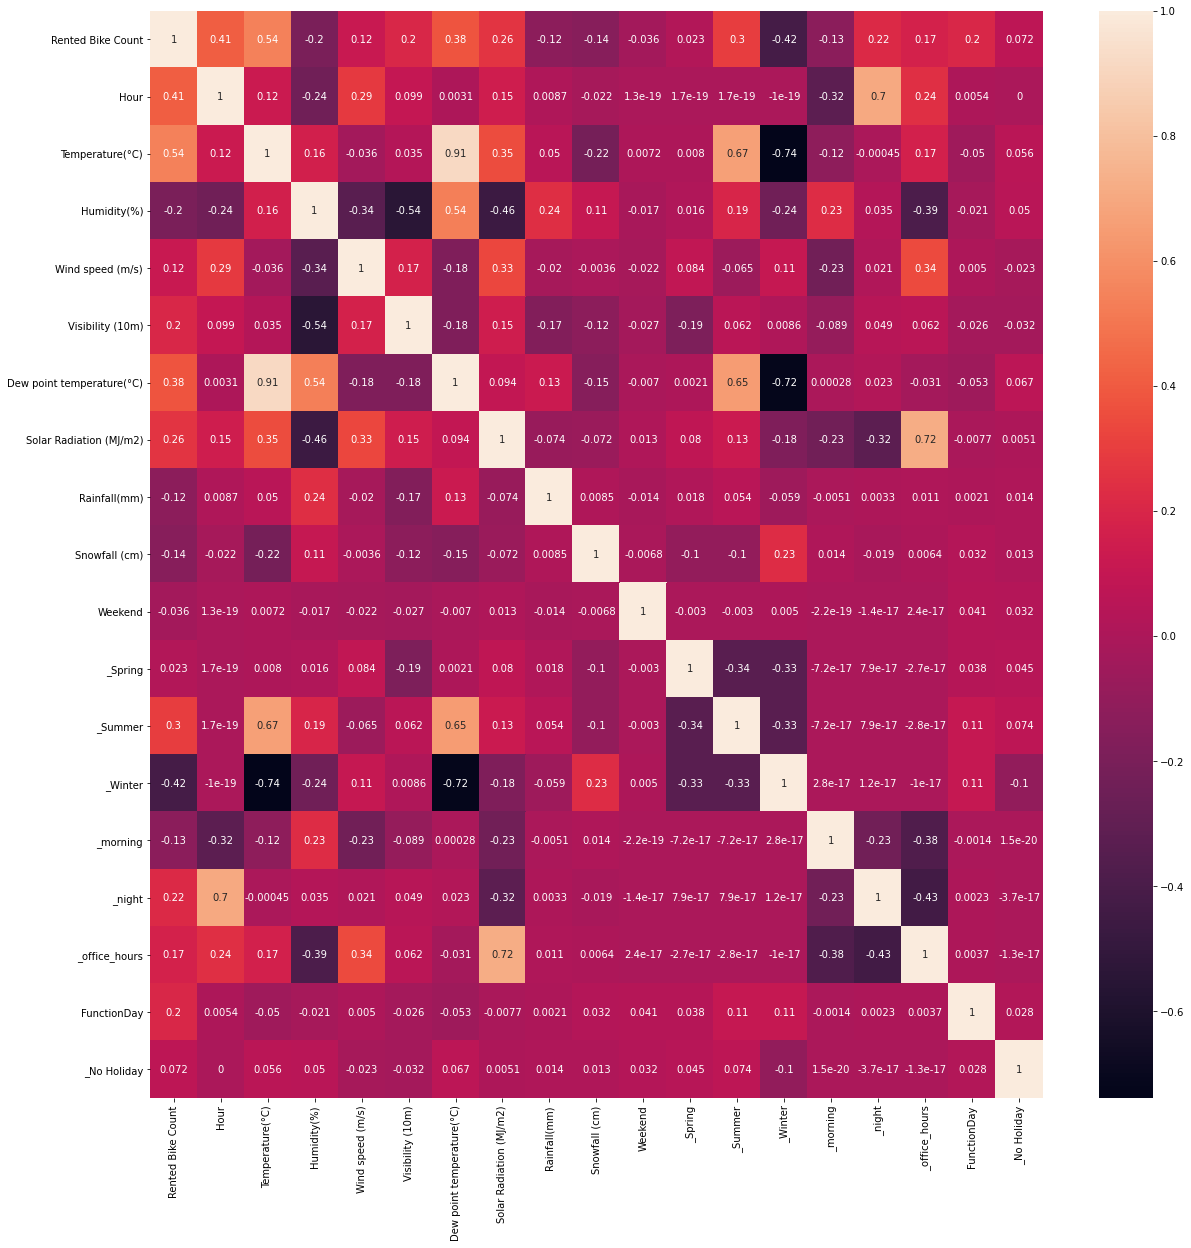

In [535]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

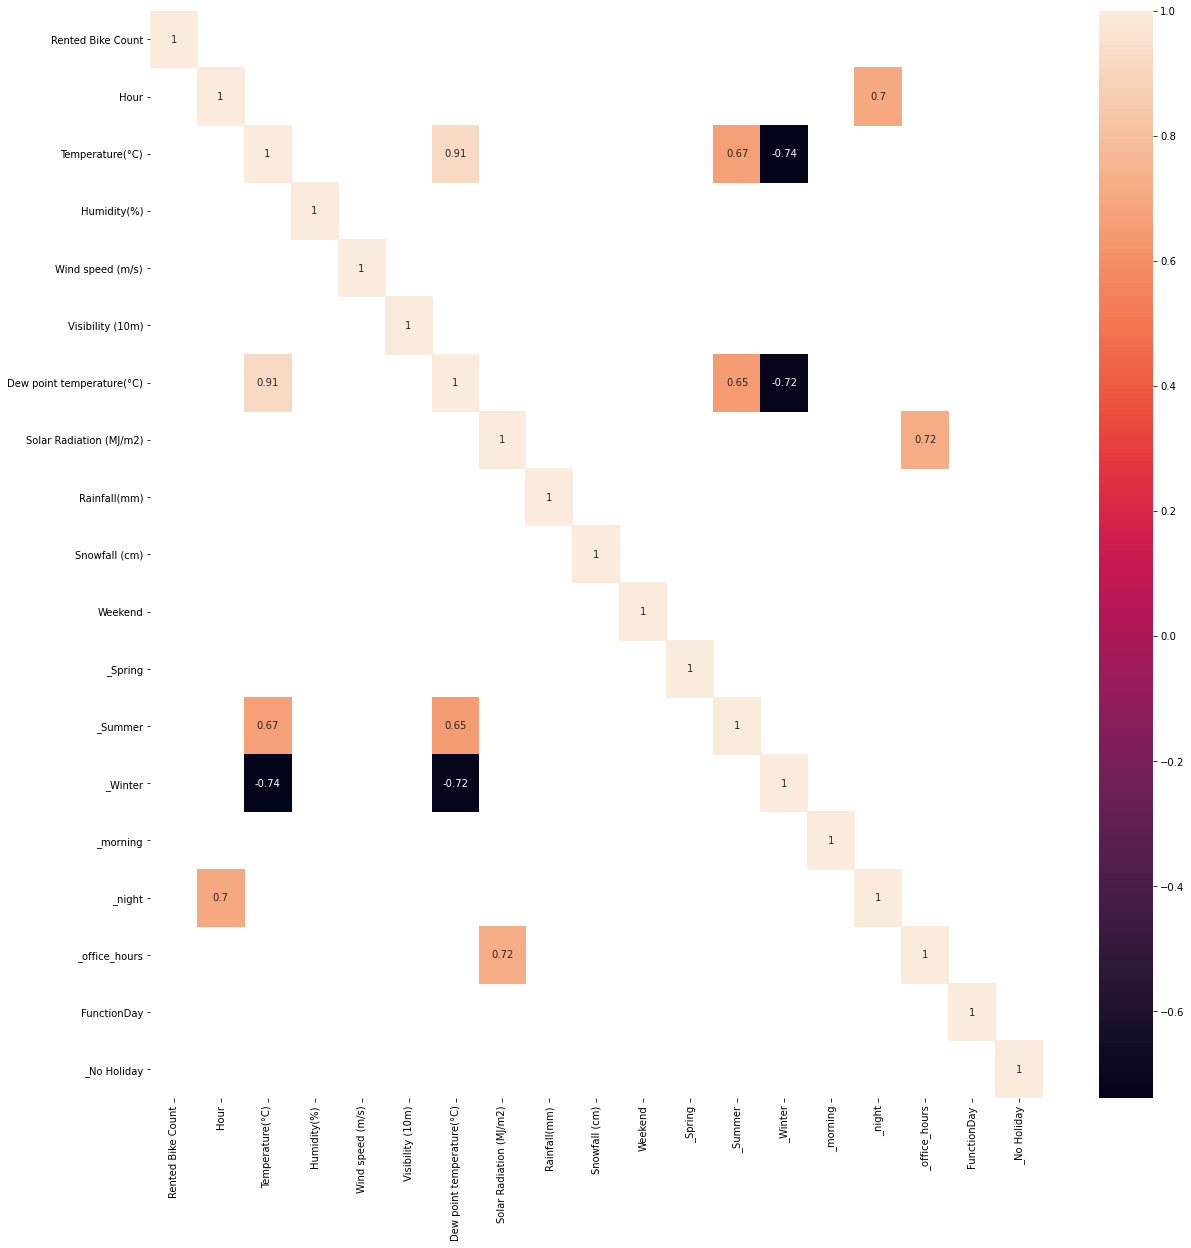

In [536]:
filter_corr = corr[np.abs(corr) > 0.6]
plt.figure(figsize=(20,20))
sns.heatmap(filter_corr, annot=True)

**Observation2: Significant linearity is identified between Temperature with Summer and Winter**

### 3.1.2 Backward Elimination

Backward elimination starts with all regressors in the model.  The F statistic is calculated as we remove regressors on at a time.  In this case, the feature with the smallest F statistic is removed from the model ands the procedure continues until the smallest partial F statistic is greater than the pre-selected cutoff value of F, and terminates otherwise.  This method sounds particularly appealing, when we’d like to see how each variable affects the model.

In [545]:
X = bikeData_feats
X = sm.add_constant(X)
X = X.drop('Rented Bike Count',axis = 1)

Y = bikeData['Rented Bike Count']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 123) 

def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop with p-value - ', worst_feature, '-', worst_pval)
        if not changed:
            break
    return included, model.summary()

In [546]:
included, summary = backward_regression(x_train, y_train)

Drop with p-value -  _morning - 0.3546089993928805
Drop with p-value -  Visibility (10m) - 0.3361794320037357


In [547]:
included

['const',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Weekend',
 '_Spring',
 '_Summer',
 '_Winter',
 '_night',
 '_office_hours',
 'FunctionDay',
 '_No Holiday']

In [548]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     491.1
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:54:45   Log-Likelihood:                -45878.
No. Observations:                6132   AIC:                         9.179e+04
Df Residuals:                    6115   BIC:                         9.190e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -77.4836    111.260     -0.696      0.486    -295.592     140.624
Hour                         46.6616      2.241     20.826      0.000      42.269      51.054
Temperature(°C)              14.9652      4.440      3.370      0.001       6.261      23.669
Humidity(%)                 -11.5795      1.202     -9.631      0.000     -13.936      -9.223
Wind speed (m/s)             22.5894      6.121      3.691      0.000      10.591      34.588
Dew point temperature(°C)    13.1618      4.643      2.835      0.005       4.060      22.264
Solar Radiation (MJ/m2)     -56.4729     11.216     -5.035      0.000     -78.460     -34.485
Rainfall(mm)                -54.6352      4.806    -11.368      0.000     -64.057     -45.213
Snowfall (cm)                30.5974     13.588      2.252      0.024       3.961      57.234
Weekend                     -81.5068     12.230     -6.665      0.000    -105.481     -57.532
_Spring                    -146.9895     16.087     -9.137      0.000    -178.526    -115.453
_Summer                    -165.6230     20.452     -8.098      0.000    -205.716    -125.530
_Winter                    -352.1340     23.080    -15.257      0.000    -397.379    -306.889
_night                     -362.5428     40.421     -8.969      0.000    -441.783    -283.303
_office_hours              -237.2287     28.093     -8.444      0.000    -292.301    -182.157
FunctionDay                 948.4915     32.210     29.447      0.000     885.349    1011.634
_No Holiday                 128.8610     25.638      5.026      0.000      78.601     179.120
==============================================================================
Omnibus:                      787.480   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1401.177
Skew:                           0.848   Prob(JB):                    5.47e-305
Kurtosis:                       4.615   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.1.3 Forward Selection

Forward elimination starts with no features, and the insertion of features into the regression model one-by-one.  First, the regressor with the highest correlation is selected for inclusion, which coincidentally the regressor that produces the largest F-statistic value when testing the significance of the model.  This is called partial correlation because technically they represent the correlation coefficients between the model residuals with a specific variable and  the model residuals with the other regressors.  All subsequent regressors are selected the same way.  The procedure continues until the F statistic exceeds a pre-selected F-value (called F-to-enter) and terminates otherwise.

In [549]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [550]:
forward_regression(x_train, y_train, 0.05)

['Temperature(°C)',
 'Hour',
 'FunctionDay',
 'const',
 'Humidity(%)',
 '_Winter',
 'Rainfall(mm)',
 'Solar Radiation (MJ/m2)',
 'Weekend',
 '_Spring',
 '_Summer',
 '_morning',
 '_No Holiday',
 'Wind speed (m/s)',
 '_night',
 '_office_hours',
 'Dew point temperature(°C)',
 'Snowfall (cm)']

### 3.1.4 Recursive Feature Elimination

RFE selects features by considering a smaller and smaller set of regressors.  The starting point is the original set of regressors. Less important regressors are recursively pruned from the initial set.  The procedure is repeated until a desired set of features remain.  That number can either be a priori specified, or can be found using cross validation. In fact, RFE offers a variant – RFECV – designed to optimally find the best subset of regressors.

In [551]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
X = x_train
y = y_train
names=pd.DataFrame(x_train.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

0
0   15
1    7
2    8
3   13
4   11
5   14
6    9
7    2
8    4
9   12
10   5
11   1
12   3
13   1
14  10
15   1
16   1
17   1
18   6

In [552]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

          Feature  Rank
11        _Spring     1
13        _Winter     1
15         _night     1
16  _office_hours     1
17    FunctionDay     1


5

### 3.1.5 Variance Inflation Factor

In [556]:
X = bikeData_feats
X = sm.add_constant(X)
X = X.drop('Rented Bike Count',axis = 1)

# filter the numerical features in the dataset
bikeData_numeric_features_vif = X.select_dtypes(include=[np.number])

# display the first five observations
bikeData_numeric_features_vif.head()

const  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0    1.0     0             -5.2           37               2.2   
1    1.0     1             -5.5           38               0.8   
2    1.0     2             -6.0           39               1.0   
3    1.0     3             -6.2           40               0.9   
4    1.0     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Weekend  _Spring  _Summer  _Winter  _morning  \
0           0.0            0.0        0        0        0        1         0   
1           0.0            0.0        0        0        0        1         0   
2           0.0            0.0        0        0        0        1         0   
3           0.0            0.0        0        0        0        1         0   
4           0.0            0.0        0        0        0        1         0   

   _night  _office_hours  FunctionDay  _No Holiday  
0       0              0            1            1  
1       0              0            1            1  
2       0              0            1            1  
3       0              0            1            1  
4       0              0            1            1

In [557]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(bikeData_numeric_features_vif.values, i) for i in range(bikeData_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = bikeData_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                   Features
0   459.850746                      const
1   119.514989  Dew point temperature(°C)
2    91.908326            Temperature(°C)
3    20.762883                Humidity(%)
4    15.894167                     _night
5    11.974332                       Hour
6    11.699001              _office_hours
7     3.401465                    _Winter
8     3.315957    Solar Radiation (MJ/m2)
9     2.655927                    _Summer
10    2.304014                   _morning
11    1.719043                    _Spring
12    1.711784           Visibility (10m)
13    1.338863           Wind speed (m/s)
14    1.122343              Snowfall (cm)
15    1.097900               Rainfall(mm)
16    1.083260                FunctionDay
17    1.025038                _No Holiday
18    1.011424                    Weekend

In [559]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(bikeData_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(bikeData_numeric_features_vif.values, i) for i in range(bikeData_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = bikeData_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        bikeData_numeric_features_vif = bikeData_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                   Features
0     9.849379                Humidity(%)
1     4.853401           Wind speed (m/s)
2     5.481401           Visibility (10m)
3     6.448034  Dew point temperature(°C)
4     3.813921    Solar Radiation (MJ/m2)
5     1.092235               Rainfall(mm)
6     1.138582              Snowfall (cm)
7     1.384914                    Weekend
8     2.085819                    _Spring
9     3.183190                    _Summer
10    4.282597                    _Winter
11    1.791175                   _morning
12    1.959260                     _night
13    5.049991              _office_hours


### 3.2 Model Building

In [488]:
Model_Features = list(bikeData_feats.columns)
Model_Features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Weekend',
 '_Spring',
 '_Summer',
 '_Winter',
 '_morning',
 '_night',
 '_office_hours',
 'FunctionDay',
 '_No Holiday']

In [489]:
Target_Variable = ['Rented Bike Count']

**Make a result dataframe**

In [490]:
#Model Parameters to be compared in each experiments
cols = ['Model_Name','Data_Type','Remarks', 
        'R-squared','Adj. R-squared', 
        'Durbin_Watson', 'JB_Prob', 'Condition_No',
        'MSE', 'RMSE', 'MAE']
# creating a empty dataframe of the colums
result_table_e3_set = pd.DataFrame(columns = cols)

In [491]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats,Target_Variable,"BIKE_LR_ALL_E31",
                                                              "All variables, no tranformation,\
                                                               no scaling, only categorical encoding",
                                                               result_table_e3_set,0.3,123)


Index(['const', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend',
       '_Spring', '_Summer', '_Winter', '_morning', '_night', '_office_hours',
       'FunctionDay', '_No Holiday'],
      dtype='object')


In [492]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     436.7
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:38:33   Log-Likelihood:                -45877.
No. Observations:                6132   AIC:                         9.179e+04
Df Residuals:                    6113   BIC:                         9.192e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -127.8734    119.185     -1.073      0.283    -361.518     105.771
Hour                         45.2435      2.752     16.438      0.000      39.848      50.639
Temperature(°C)              15.6800      4.477      3.503      0.000       6.904      24.456
Humidity(%)                 -11.2302      1.245     -9.022      0.000     -13.670      -8.790
Wind speed (m/s)             22.7643      6.195      3.675      0.000      10.620      34.909
Visibility (10m)              0.0114      0.012      0.965      0.334      -0.012       0.035
Dew point temperature(°C)    12.5548      4.666      2.691      0.007       3.408      21.702
Solar Radiation (MJ/m2)     -57.9356     11.569     -5.008      0.000     -80.615     -35.256
Rainfall(mm)                -54.6585      4.807    -11.371      0.000     -64.082     -45.235
Snowfall (cm)                30.6599     13.588      2.256      0.024       4.023      57.297
Weekend                     -80.9964     12.240     -6.617      0.000    -104.991     -57.002
_Spring                    -143.0367     16.555     -8.640      0.000    -175.491    -110.583
_Summer                    -167.6447     20.509     -8.174      0.000    -207.850    -127.440
_Winter                    -346.8689     23.510    -14.754      0.000    -392.956    -300.782
_morning                     20.7281     22.390      0.926      0.355     -23.165      64.621
_night                     -329.9036     53.998     -6.110      0.000    -435.758    -224.049
_office_hours              -211.7913     38.174     -5.548      0.000    -286.626    -136.957
FunctionDay                 948.8949     32.212     29.458      0.000     885.748    1012.042
_No Holiday                 129.4841     25.643      5.050      0.000      79.215     179.753
==============================================================================
Omnibus:                      788.480   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.783
Skew:                           0.848   Prob(JB):                    3.32e-306
Kurtosis:                       4.623   Cond. No.                     3.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [493]:
result_table_e3_set.tail()

Model_Name Data_Type  \
0   BIKE_LR_ALL_E31_Test      Test   
1  BIKE_LR_ALL_E31_Train     Train   

                                             Remarks  R-squared  \
0  All variables, no tranformation,              ...    0.56251   
1  All variables, no tranformation,              ...    0.56251   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
0        0.561222       2.017063  3.319355e-306  33980.757045  180695.782370   
1        0.561222       2.017063  3.319355e-306  33980.757045  184495.576418   

         RMSE         MAE  
0  425.083265  327.883076  
1  429.529483  324.589334

### 3.3 Model Evaluation

#### 3.3.1 Determinant of correlaton Matrix

***Let D be the determinant of correlation matrix. \
Then 0 < D < 1\
D=0 High multicollinearity\
D=1 No multicollinearit***

In [60]:
bikeData_feats_noTarget = bikeData_feats.drop(Target_Variable,axis=1)
np.linalg.det(bikeData_feats_noTarget.corr())

nan

#### 3.3.2 Condition Number

***CN > 1000 Severe multicollinearity\
100 < CN < 1000 Moderate multicollinearity\
100 < CN No multicollinearity***

In [61]:
print("Condition Number is very High = ",lr_model.condition_number)

Condition Number is very High =  2.0655234652781436e+21


#### Experiment 2

Reduce some features which are shown as linear from the heatmap

In [62]:
bikeData_feats_e32 = bikeData_feats.drop(['_Summer', '_Winter','Dew point temperature(°C)'],axis=1)

In [63]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E32",
                                                              "Base = BIKE_LR_ALL_E32,\
                                                               Removed high correlations",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Weekend', '_Spring', '_morning', '_night',
       '_office_hours', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [64]:
result_table_e3_set.tail()

Model_Name Data_Type  \
0   BIKE_LR_ALL_E31_Test      Test   
1  BIKE_LR_ALL_E31_Train     Train   
2   BIKE_LR_ALL_E32_Test      Test   
3  BIKE_LR_ALL_E32_Train     Train   

                                             Remarks  R-squared  \
0  All variables, no tranformation,              ...   0.564021   
1  All variables, no tranformation,              ...   0.564021   
2  Base = BIKE_LR_ALL_E32,                       ...   0.534872   
3  Base = BIKE_LR_ALL_E32,                       ...   0.534872   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
0        0.562741       2.030661  6.873705e-191  2.065523e+21  188027.008563   
1        0.562741       2.030661  6.873705e-191  2.065523e+21  182048.097632   
2        0.533764       2.027046  3.108138e-154  8.461955e+20  198456.755841   
3        0.533764       2.027046  3.108138e-154  8.461955e+20  194219.218935   

         RMSE         MAE  
0  433.620812  330.003026  
1  426.670948  327.656029  
2  445.484855  336.004739  
3  440.703096  339.553418

<AxesSubplot:>

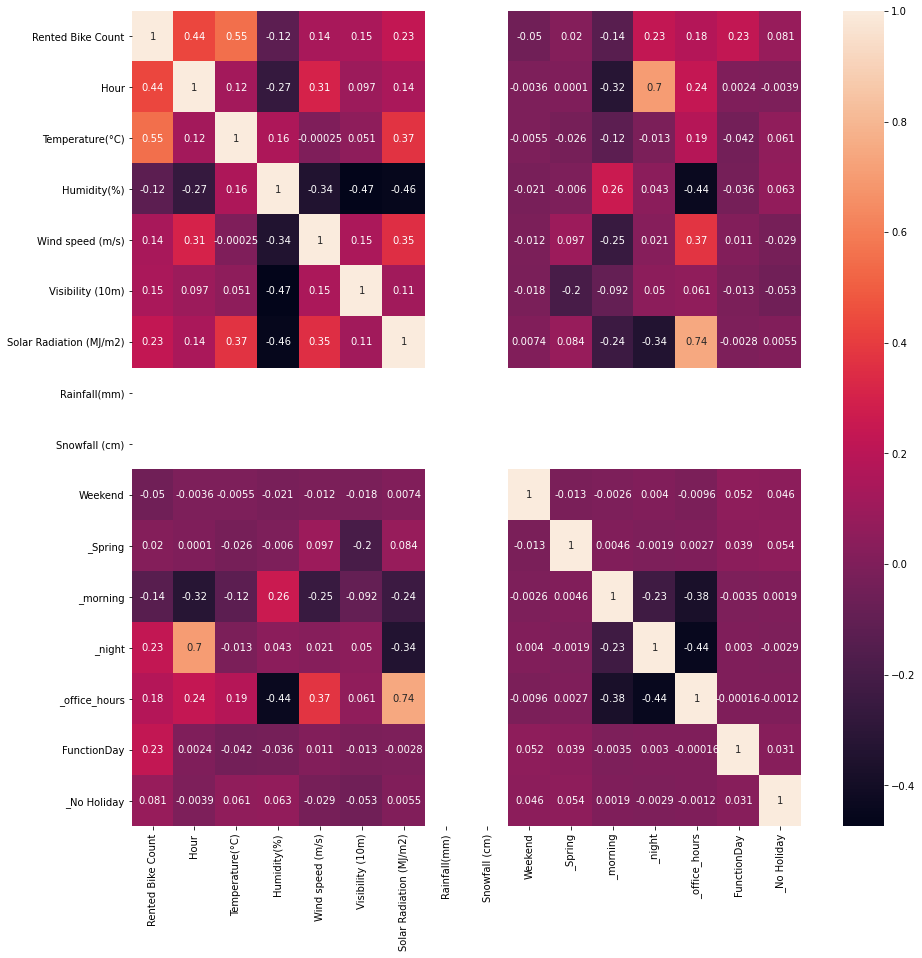

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(bikeData_feats_e32.corr(),annot=True)

#### Experiment 3

Reduce some more  features which are showing linearity near to 5

In [66]:
bikeData_feats_e33 = bikeData_feats.drop(['_Summer', '_Winter',\
                                          'Dew point temperature(°C)',\
                                          'Humidity(%)','_night'],axis=1)

In [67]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E33",
                                                              "Removed correlation near to |0.5|,\
                                                               base BIKE_LR_ALL_E32",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Weekend', '_Spring', '_morning', '_night',
       '_office_hours', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [68]:
result_table_e3_set.tail()

Model_Name Data_Type  \
1  BIKE_LR_ALL_E31_Train     Train   
2   BIKE_LR_ALL_E32_Test      Test   
3  BIKE_LR_ALL_E32_Train     Train   
4   BIKE_LR_ALL_E33_Test      Test   
5  BIKE_LR_ALL_E33_Train     Train   

                                             Remarks  R-squared  \
1  All variables, no tranformation,              ...   0.564021   
2  Base = BIKE_LR_ALL_E32,                       ...   0.534872   
3  Base = BIKE_LR_ALL_E32,                       ...   0.534872   
4  Removed correlation near to |0.5|,            ...   0.534872   
5  Removed correlation near to |0.5|,            ...   0.534872   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
1        0.562741       2.030661  6.873705e-191  2.065523e+21  182048.097632   
2        0.533764       2.027046  3.108138e-154  8.461955e+20  198456.755841   
3        0.533764       2.027046  3.108138e-154  8.461955e+20  194219.218935   
4        0.533764       2.027046  3.108138e-154  8.461955e+20  198456.755841   
5        0.533764       2.027046  3.108138e-154  8.461955e+20  194219.218935   

         RMSE         MAE  
1  426.670948  327.656029  
2  445.484855  336.004739  
3  440.703096  339.553418  
4  445.484855  336.004739  
5  440.703096  339.553418

***Observation: No Improvement has been observed from Experiment 32***

#### Experiment 4

Lets Scale the Data

In [69]:
bikeData_feats_e34,var_names = standardScale_dataframe(bikeData_feats)

Rented Bike Count_std
Hour_std
Temperature(°C)_std
Humidity(%)_std
Wind speed (m/s)_std
Visibility (10m)_std
Dew point temperature(°C)_std
Solar Radiation (MJ/m2)_std
Rainfall(mm)_std
Snowfall (cm)_std
Weekend_std
_Spring_std
_Summer_std
_Winter_std
_morning_std
_night_std
_office_hours_std
FunctionDay_std
_No Holiday_std


In [70]:
bikeData_feats_e34_std = bikeData_feats_e34[var_names]


In [71]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e34_std,['Rented Bike Count_std'],"BIKE_LR_ALL_E34",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(°C)_std', 'Solar Radiation (MJ/m2)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_morning_std', '_night_std',
       '_office_hours_std', 'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


In [72]:
result_table_e3_set.tail()

Model_Name Data_Type  \
3  BIKE_LR_ALL_E32_Train     Train   
4   BIKE_LR_ALL_E33_Test      Test   
5  BIKE_LR_ALL_E33_Train     Train   
6   BIKE_LR_ALL_E34_Test      Test   
7  BIKE_LR_ALL_E34_Train     Train   

                                             Remarks  R-squared  \
3  Base = BIKE_LR_ALL_E32,                       ...   0.534872   
4  Removed correlation near to |0.5|,            ...   0.534872   
5  Removed correlation near to |0.5|,            ...   0.534872   
6                   input and output variable scaled   0.564021   
7                   input and output variable scaled   0.564021   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
3        0.533764       2.027046  3.108138e-154  8.461955e+20  194219.218935   
4        0.533764       2.027046  3.108138e-154  8.461955e+20  198456.755841   
5        0.533764       2.027046  3.108138e-154  8.461955e+20  194219.218935   
6        0.562741       2.030661  6.873705e-191  3.660203e+16       0.445319   
7        0.562741       2.030661  6.873705e-191  3.660203e+16       0.431159   

         RMSE         MAE  
3  440.703096  339.553418  
4  445.484855  336.004739  
5  440.703096  339.553418  
6    0.667322    0.507859  
7    0.656627    0.504247

In [73]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Rented Bike Count_std   R-squared:                       0.564
Model:                               OLS   Adj. R-squared:                  0.563
Method:                    Least Squares   F-statistic:                     440.9
Date:                   Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                           20:57:39   Log-Likelihood:                -5460.7
No. Observations:                   5470   AIC:                         1.096e+04
Df Residuals:                       5453   BIC:                         1.107e+04
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.0036      0.009     -0.404      0.687      -0.021       0.014
Hour_std                          0.5152      0.031     16.393      0.000       0.454       0.577
Temperature(°C)_std               0.4932      0.084      5.896      0.000       0.329       0.657
Humidity(%)_std                  -0.1681      0.038     -4.388      0.000      -0.243      -0.093
Wind speed (m/s)_std              0.0353      0.010      3.409      0.001       0.015       0.056
Visibility (10m)_std              0.0102      0.011      0.922      0.356      -0.012       0.032
Dew point temperature(°C)_std    -0.0345      0.095     -0.364      0.716      -0.220       0.151
Solar Radiation (MJ/m2)_std      -0.0975      0.017     -5.901      0.000      -0.130      -0.065
Rainfall(mm)_std               2.956e-16   1.75e-16      1.685      0.092   -4.84e-17     6.4e-16
Snowfall (cm)_std              -4.46e-16   1.39e-16     -3.210      0.001   -7.18e-16   -1.74e-16
Weekend_std                      -0.0519      0.009     -5.801      0.000      -0.069      -0.034
_Spring_std                      -0.0948      0.012     -8.165      0.000      -0.118      -0.072
_Summer_std                      -0.0956      0.015     -6.591      0.000      -0.124      -0.067
_Winter_std                      -0.2616      0.016    -16.453      0.000      -0.293      -0.230
_morning_std                      0.0282      0.014      2.074      0.038       0.002       0.055
_night_std                       -0.1959      0.036     -5.387      0.000      -0.267      -0.125
_office_hours_std                -0.1329      0.032     -4.181      0.000      -0.195      -0.071
FunctionDay_std                   0.2820      0.009     29.994      0.000       0.264       0.300
_No Holiday_std                   0.0386      0.009      4.180      0.000       0.020       0.057
==============================================================================
Omnibus:                      575.679   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              875.732
Skew:                           0.780   Prob(JB):                    6.87e-191
Kurtosis:                       4.186   Cond. No.                     3.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Experiment 5

No Scaling of Target Variable

In [74]:
bikeData_feats_e35_std = bikeData_feats_e34[var_names]
bikeData_feats_e35_std.drop('Rented Bike Count_std', axis=1, inplace=True)
bikeData_feats_e35_std = pd.concat([bikeData_feats_e35_std,bikeData['Rented Bike Count']],axis=1)

bikeData_feats_e35_std.head(3)

Hour_std  Temperature(°C)_std  Humidity(%)_std  Wind speed (m/s)_std  \
0 -1.674130            -1.608494        -1.000676              0.470287   
1 -1.529762            -1.634205        -0.947743             -0.907665   
2 -1.385394            -1.677058        -0.894810             -0.710815   

   Visibility (10m)_std  Dew point temperature(°C)_std  \
0              0.887733                      -1.716576   
1              0.887733                      -1.716576   
2              0.887733                      -1.724456   

   Solar Radiation (MJ/m2)_std  Rainfall(mm)_std  Snowfall (cm)_std  \
0                    -0.684668               0.0                0.0   
1                    -0.684668               0.0                0.0   
2                    -0.684668               0.0                0.0   

   Weekend_std  _Spring_std  _Summer_std  _Winter_std  _morning_std  \
0    -0.639429    -0.589418     -0.58863     1.859589     -0.441122   
1    -0.639429    -0.589418     -0.58863     1.859589     -0.441122   
2    -0.639429    -0.589418     -0.58863     1.859589     -0.441122   

   _night_std  _office_hours_std  FunctionDay_std  _No Holiday_std  \
0   -0.517538          -0.851119         0.193838         0.228565   
1   -0.517538          -0.851119         0.193838         0.228565   
2   -0.517538          -0.851119         0.193838         0.228565   

   Rented Bike Count  
0                254  
1                204  
2                173

In [75]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e35_std,
                                                              ['Rented Bike Count'],"BIKE_LR_ALL_E35",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(°C)_std', 'Solar Radiation (MJ/m2)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_morning_std', '_night_std',
       '_office_hours_std', 'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


In [76]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     440.9
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:57:39   Log-Likelihood:                -40888.
No. Observations:                5470   AIC:                         8.181e+04
Df Residuals:                    5453   BIC:                         8.192e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           765.9287      5.779    132.530      0.000     754.599     777.258
Hour_std                        334.7756     20.422     16.393      0.000     294.741     374.810
Temperature(°C)_std             320.4531     54.350      5.896      0.000     213.905     427.001
Humidity(%)_std                -109.2539     24.899     -4.388      0.000    -158.065     -60.442
Wind speed (m/s)_std             22.9172      6.723      3.409      0.001       9.737      36.097
Visibility (10m)_std              6.6584      7.221      0.922      0.356      -7.497      20.814
Dew point temperature(°C)_std   -22.4062     61.487     -0.364      0.716    -142.946      98.133
Solar Radiation (MJ/m2)_std     -63.3851     10.741     -5.901      0.000     -84.442     -42.328
Rainfall(mm)_std               1.838e-13   1.14e-13      1.612      0.107   -3.97e-14    4.07e-13
Snowfall (cm)_std             -3.054e-13   9.03e-14     -3.382      0.001   -4.82e-13   -1.28e-13
Weekend_std                     -33.7423      5.816     -5.801      0.000     -45.145     -22.340
_Spring_std                     -61.6100      7.546     -8.165      0.000     -76.402     -46.818
_Summer_std                     -62.1296      9.426     -6.591      0.000     -80.609     -43.650
_Winter_std                    -169.9587     10.330    -16.453      0.000    -190.210    -149.707
_morning_std                     18.2956      8.821      2.074      0.038       1.003      35.589
_night_std                     -127.3197     23.633     -5.387      0.000    -173.649     -80.990
_office_hours_std               -86.3623     20.654     -4.181      0.000    -126.853     -45.872
FunctionDay_std                 183.2279      6.109     29.994      0.000     171.252     195.204
_No Holiday_std                  25.0676      5.997      4.180      0.000      13.311      36.824
==============================================================================
Omnibus:                      575.679   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              875.732
Skew:                           0.780   Prob(JB):                    6.87e-191
Kurtosis:                       4.186   Cond. No.                     3.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
result_table_e3_set.tail(20)

Model_Name Data_Type  \
0   BIKE_LR_ALL_E31_Test      Test   
1  BIKE_LR_ALL_E31_Train     Train   
2   BIKE_LR_ALL_E32_Test      Test   
3  BIKE_LR_ALL_E32_Train     Train   
4   BIKE_LR_ALL_E33_Test      Test   
5  BIKE_LR_ALL_E33_Train     Train   
6   BIKE_LR_ALL_E34_Test      Test   
7  BIKE_LR_ALL_E34_Train     Train   
8   BIKE_LR_ALL_E35_Test      Test   
9  BIKE_LR_ALL_E35_Train     Train   

                                             Remarks  R-squared  \
0  All variables, no tranformation,              ...   0.564021   
1  All variables, no tranformation,              ...   0.564021   
2  Base = BIKE_LR_ALL_E32,                       ...   0.534872   
3  Base = BIKE_LR_ALL_E32,                       ...   0.534872   
4  Removed correlation near to |0.5|,            ...   0.534872   
5  Removed correlation near to |0.5|,            ...   0.534872   
6                   input and output variable scaled   0.564021   
7                   input and output variable scaled   0.564021   
8                   input and output variable scaled   0.564021   
9                   input and output variable scaled   0.564021   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
0        0.562741       2.030661  6.873705e-191  2.065523e+21  188027.008563   
1        0.562741       2.030661  6.873705e-191  2.065523e+21  182048.097632   
2        0.533764       2.027046  3.108138e-154  8.461955e+20  198456.755841   
3        0.533764       2.027046  3.108138e-154  8.461955e+20  194219.218935   
4        0.533764       2.027046  3.108138e-154  8.461955e+20  198456.755841   
5        0.533764       2.027046  3.108138e-154  8.461955e+20  194219.218935   
6        0.562741       2.030661  6.873705e-191  3.660203e+16       0.445319   
7        0.562741       2.030661  6.873705e-191  3.660203e+16       0.431159   
8        0.562741       2.030661  6.873705e-191  3.660203e+16  188027.008563   
9        0.562741       2.030661  6.873705e-191  3.660203e+16  182048.097632   

         RMSE         MAE  
0  433.620812  330.003026  
1  426.670948  327.656029  
2  445.484855  336.004739  
3  440.703096  339.553418  
4  445.484855  336.004739  
5  440.703096  339.553418  
6    0.667322    0.507859  
7    0.656627    0.504247  
8  433.620812  330.003026  
9  426.670948  327.656029

#### 3.3.2.1 Condition Number

***The Conditions Number has been reduced after the scaling of the data***

In [78]:
print("Condition Number is now normal after the scale transformations = ",lr_model.condition_number)

Condition Number is now normal after the scale transformations =  3.660202552055593e+16


#### 3.3.3 Existence of linear relationship

The independent variables must have a linear relationship with the dependent 
variable

In [79]:
import math

def plot_residual_linearity(residual,predictors,figsize=(10,6)):
    N = len(predictors.columns)
    rows = math.ceil(N/3)
    if rows == 0:
        return
    
    fig, axs = plt.subplots(rows,3, figsize=figsize)
    fig.subplots_adjust(hspace = .2, wspace=.2)

    axs = axs.ravel()
    
    i = 0
    for pred in predictors.columns:
        sns.scatterplot(x = predictors[pred],y=residual,ax=axs[i] )
        i +=1
        

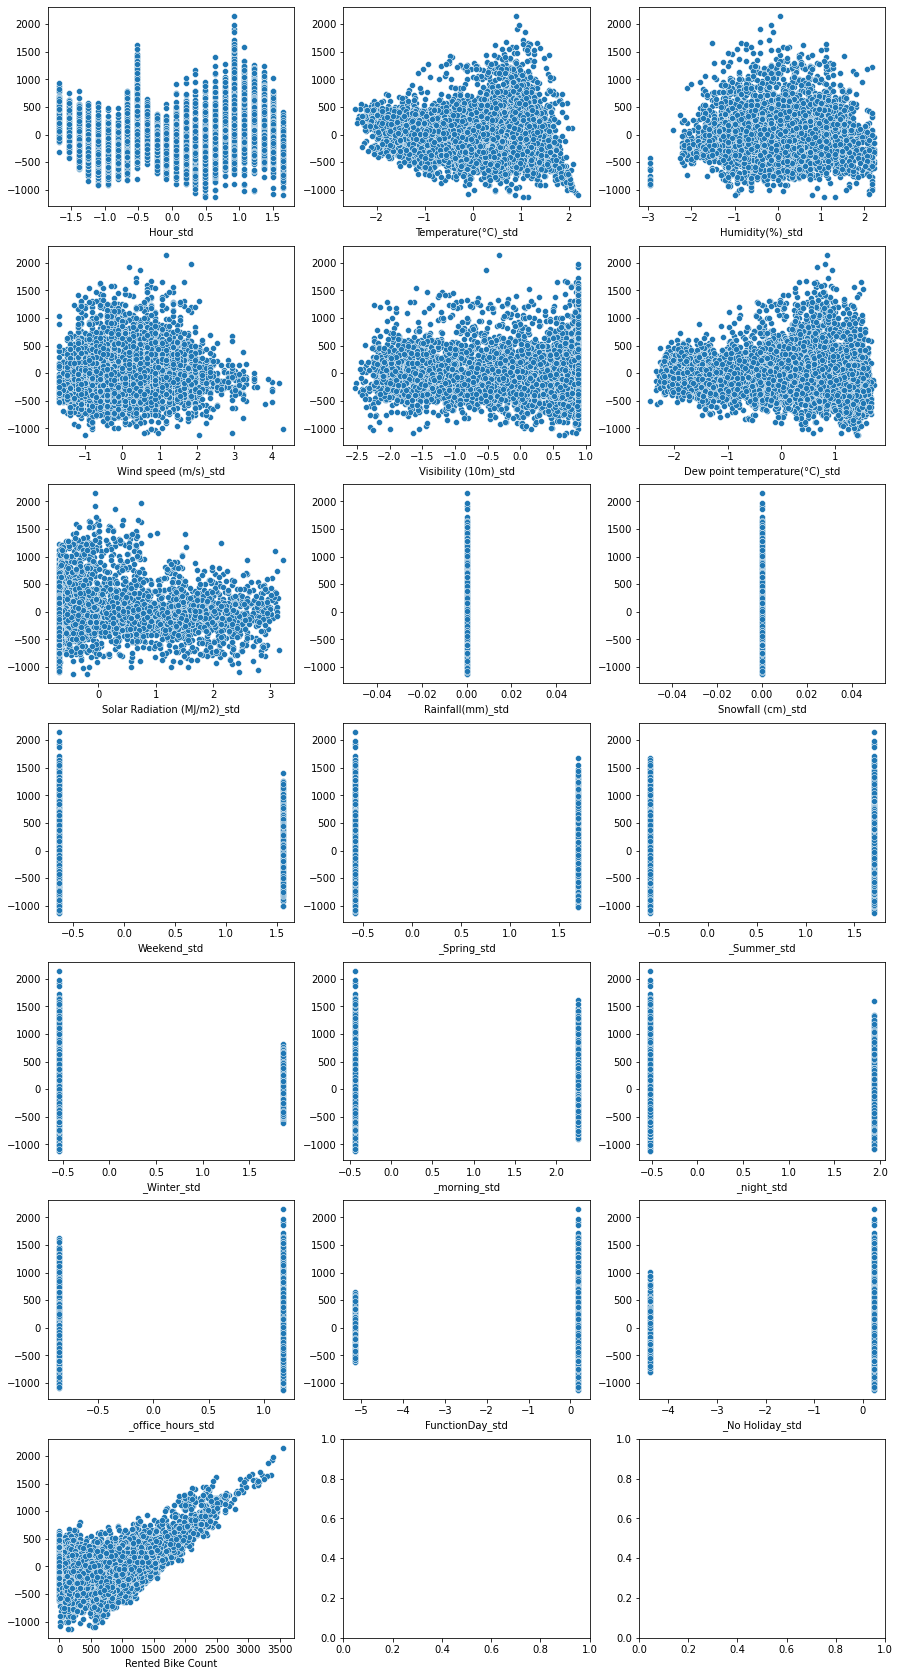

In [80]:

plot_residual_linearity(lr_model.resid,bikeData_feats_e35_std,figsize=(15, 30))

***Observation: There is no specific pattern observed between predictors and residuals***

A scatter plot depicting no pattern indicates that the variable has a linear relationship with the response variable. 

we see a random pattern in all the plots of independent. Hence, we may say that, the predictors are linearly related with the response variable

Relation is seen only with the target variable as it was present in the input dataframe.

#### 3.3.4 Assumption of autocorrelation


Assumption of autocorrelation is violated when residuals are correlated within 
themselves, i.e. they are serially correlated

To test whether the error terms are autocorrelated,we do Durbin-Watson test

In [81]:
statsmodels.stats.stattools.durbin_watson(lr_model.resid, axis=0)

2.030660828933863

If the value is near to 2, then there is No autocorrelation

#### 3.3.5 Homoscedasticity assumption

In [82]:
lm,lmpval,fval,f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr_model.resid,lr_model.model.exog)
print(lmpval)

2.2954178124212818e-167


There are two big reasons why we need homoscedasticity: While heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise. ... This effect occurs because heteroscedasticity increases the variance of the coefficient estimates but the OLS procedure does not detect this increase.

***Observation: As per the test, the error terms are heteroskedastic***

#### Experiment 6

Trying to redude heteroskedasticity by removing RainFall and Snow Fall from the model, as the above scatter plot have shown a funnel like pattern.

In [83]:
bikeData.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Hour_bkt', 'Weekend'],
      dtype='object')

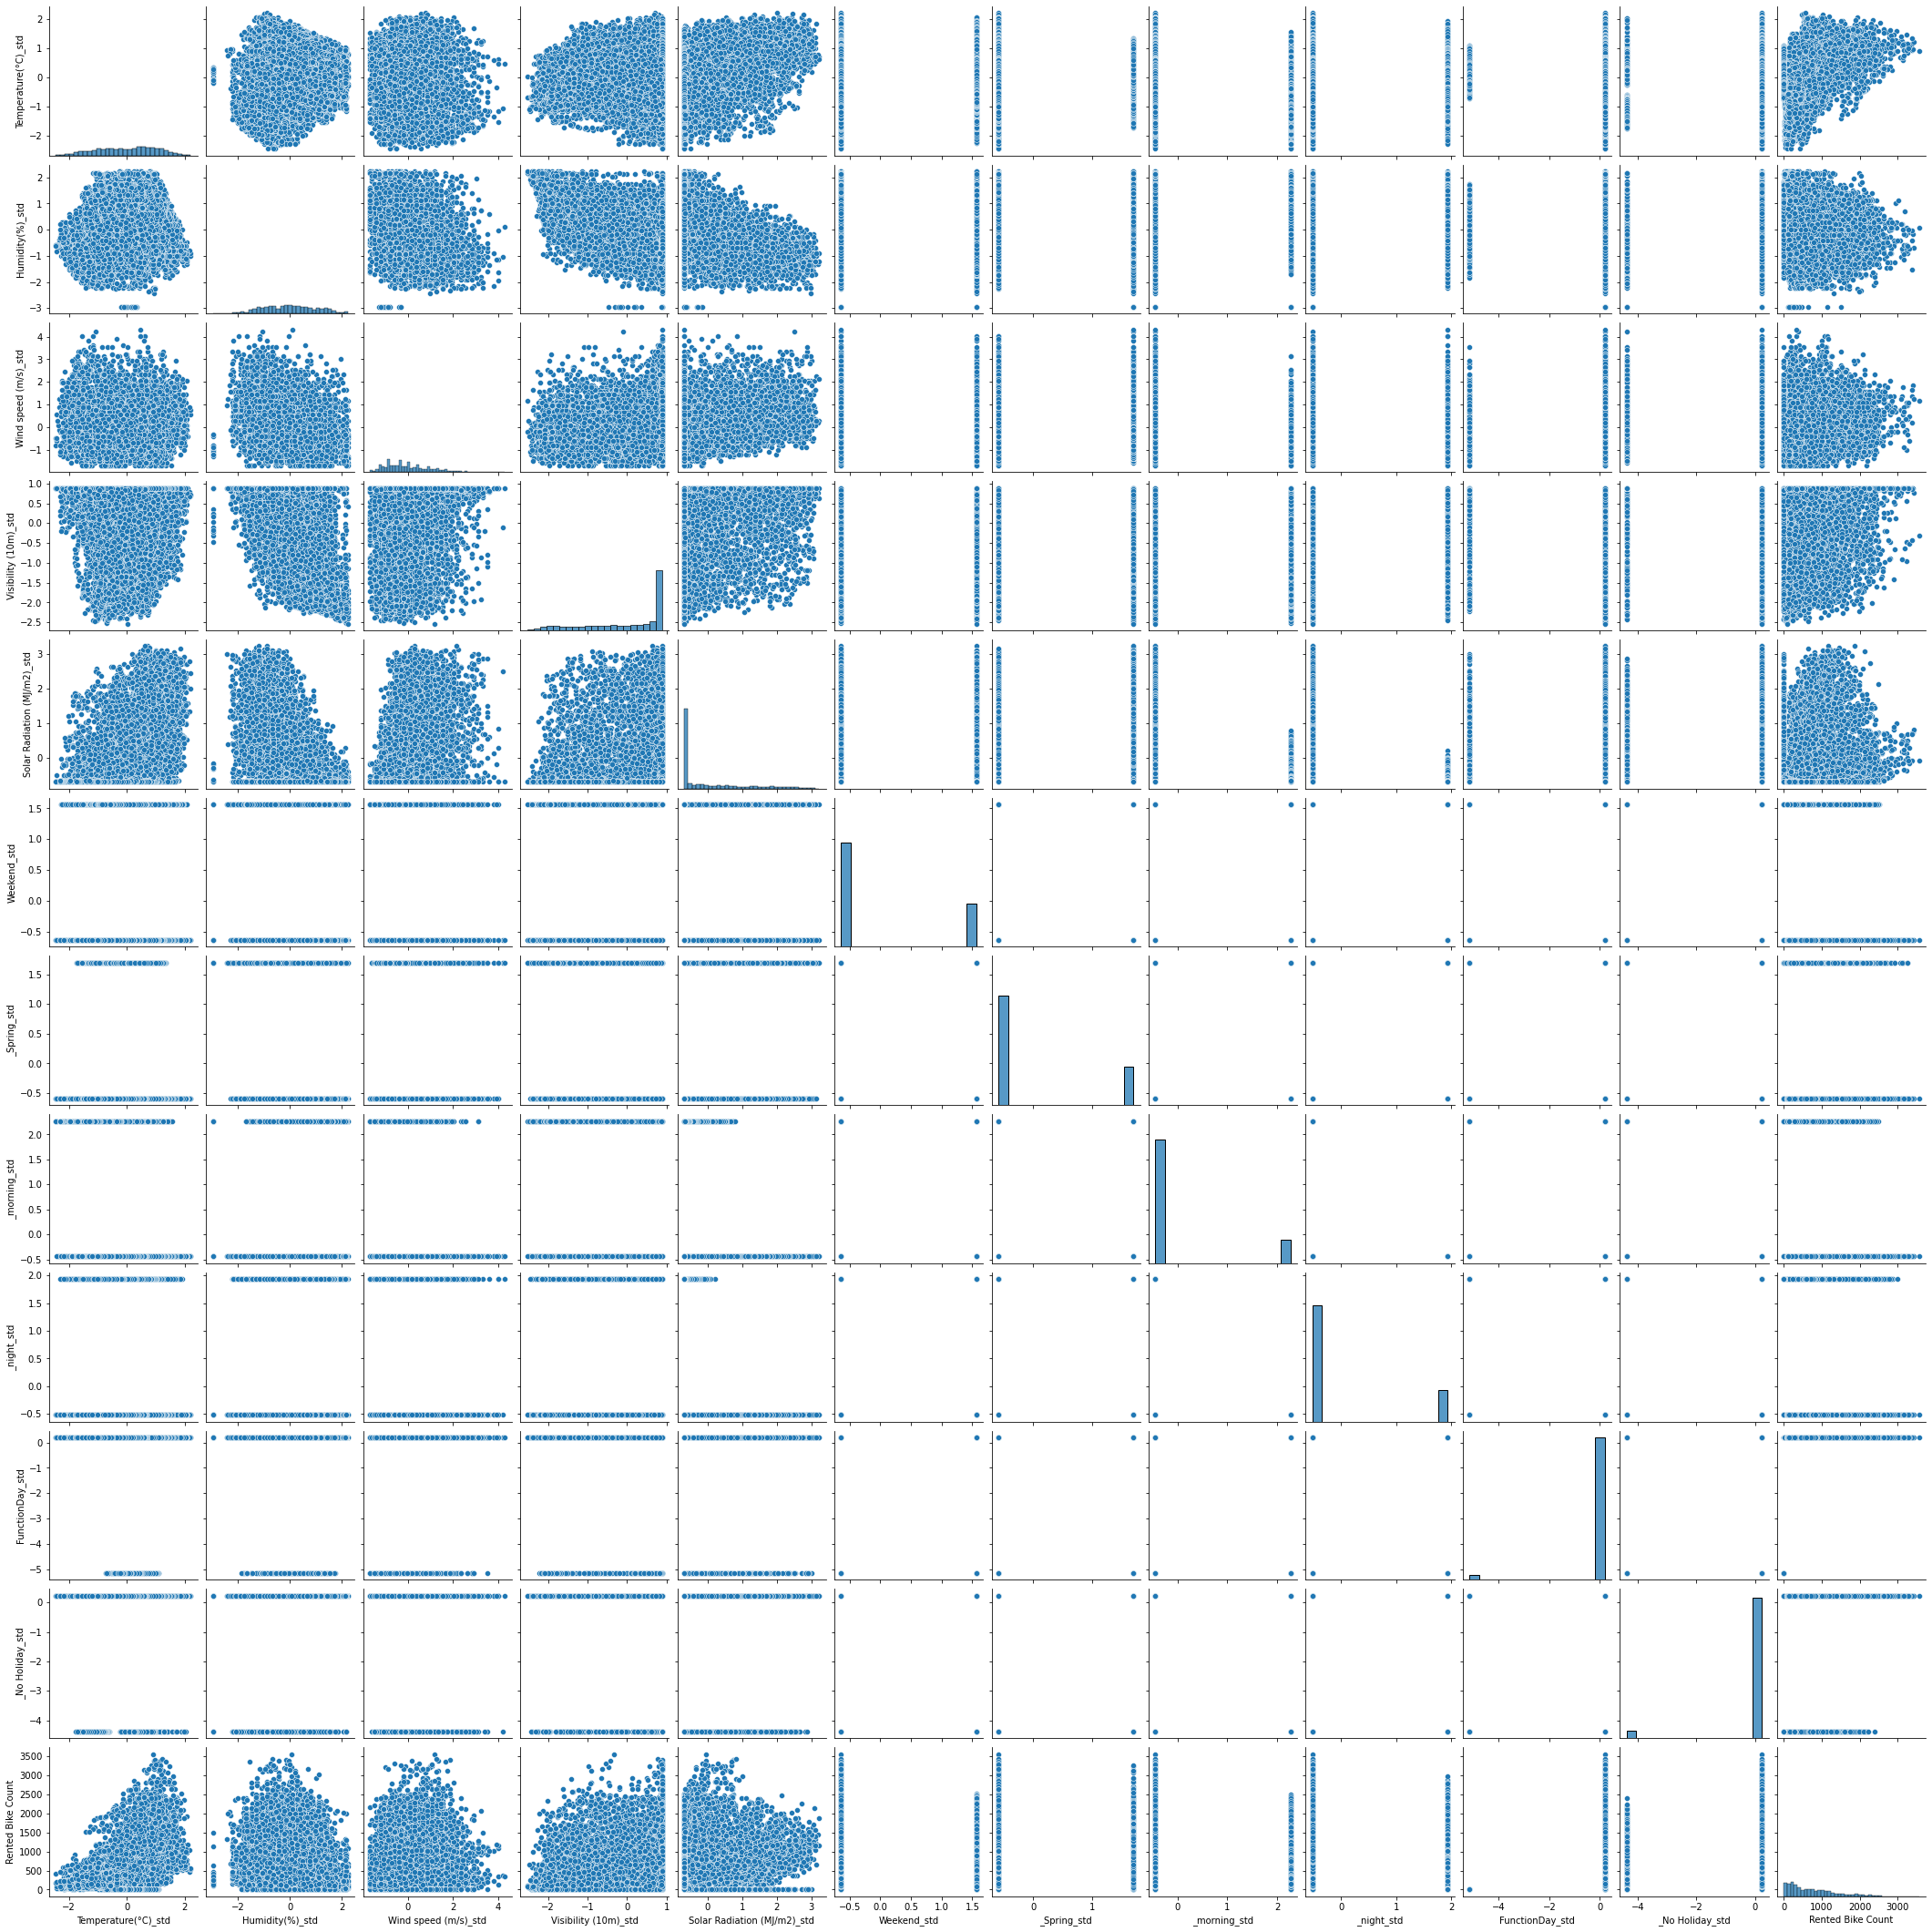

In [84]:
bikeData_feats_e36_std = bikeData_feats_e35_std[['Temperature(°C)_std', 'Humidity(%)_std', 'Wind speed (m/s)_std',
       'Visibility (10m)_std', 
       'Solar Radiation (MJ/m2)_std', 
       'Weekend_std', '_Spring_std', 
       '_morning_std', '_night_std', 'FunctionDay_std', '_No Holiday_std',
       'Rented Bike Count']]
sns.pairplot(bikeData_feats_e36_std)

In [85]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e36_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_RED_E36",
                                                              "input and output variable scaled\
                                                               reduced few variables",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

Index(['const', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Weekend_std', '_Spring_std',
       '_morning_std', '_night_std', 'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


Model_Name Data_Type  \
7       BIKE_LR_ALL_E34_Train     Train   
8        BIKE_LR_ALL_E35_Test      Test   
9       BIKE_LR_ALL_E35_Train     Train   
10   BIKE_LR_STD_RED_E36_Test      Test   
11  BIKE_LR_STD_RED_E36_Train     Train   

                                              Remarks  R-squared  \
7                    input and output variable scaled   0.564021   
8                    input and output variable scaled   0.564021   
9                    input and output variable scaled   0.564021   
10  input and output variable scaled              ...   0.485486   
11  input and output variable scaled              ...   0.485486   

    Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
7         0.562741       2.030661  6.873705e-191  3.660203e+16       0.431159   
8         0.562741       2.030661  6.873705e-191  3.660203e+16  188027.008563   
9         0.562741       2.030661  6.873705e-191  3.660203e+16  182048.097632   
10        0.484449       2.021124   0.000000e+00  3.124740e+00  220137.834241   
11        0.484449       2.021124   0.000000e+00  3.124740e+00  214841.195321   

          RMSE         MAE  
7     0.656627    0.504247  
8   433.620812  330.003026  
9   426.670948  327.656029  
10  469.188485  340.263018  
11  463.509650  343.738108

In [86]:
lm,lmpval,fval,f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr_model.resid,lr_model.model.exog)
print(lmpval)

4.0812621877167975e-142


***Observation: Experiment did not improve the hetroskedasticity, and also the model performance have been reduced. So lets leave it here.***

#### 3.3.6 The error terms must follow normal distribution


<AxesSubplot:ylabel='Density'>

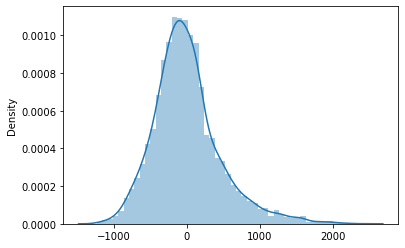

In [87]:
residuals = lr_model.resid
sns.distplot(residuals,kde=True)

In [88]:
JB,JBpv,skew,kurt =sm.stats.stattools.jarque_bera(residuals,axis=0)
JBpv

0.0

##### Experiment 7

In [89]:

bikeData_feats_e37_std = bikeData_feats_e35_std.copy()
bikeData_feats_e37_std = bikeData_feats_e37_std.drop('Rented Bike Count', axis=1)
for i in range(len(bikeData_feats_e37_std.columns)):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(bikeData_feats_e37_std.values,i) for i in range(bikeData_feats_e37_std.shape[1])]
    vif['Features'] = bikeData_feats_e37_std.columns
    vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)
    
    multi = vif[vif.VIF_Factor > 10]
    
    if (multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor',ascending = False)
        bikeData_feats_e37_std = bikeData_feats_e37_std.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)
        break;


    VIF_Factor                     Features
0     1.299288                     Hour_std
1     4.951976          Temperature(°C)_std
2     2.378984              Humidity(%)_std
3     1.357027         Wind speed (m/s)_std
4     1.548806         Visibility (10m)_std
5     3.177693  Solar Radiation (MJ/m2)_std
6          NaN             Rainfall(mm)_std
7          NaN            Snowfall (cm)_std
8     1.009465                  Weekend_std
9     1.699794                  _Spring_std
10    2.669788                  _Summer_std
11    3.188092                  _Winter_std
12    1.288551                 _morning_std
13    2.690699            _office_hours_std
14    1.081734              FunctionDay_std
15    1.026677              _No Holiday_std


In [90]:
X = bikeData_feats_e37_std
X = sm.add_constant(X)
Y = bikeData['Rented Bike Count']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 123) 
lin_reg_model = sm.OLS(y_train,x_train).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     499.2
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:58:02   Log-Likelihood:                -40903.
No. Observations:                5470   AIC:                         8.184e+04
Df Residuals:                    5455   BIC:                         8.194e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         766.0907      5.794    132.224      0.000     754.732     777.449
Hour_std                      230.8185      6.579     35.084      0.000     217.921     243.716
Temperature(°C)_std           310.2244     12.878     24.090      0.000     284.979     335.470
Humidity(%)_std              -122.0954      8.917    -13.693      0.000    -139.576    -104.615
Wind speed (m/s)_std           26.3531      6.707      3.929      0.000      13.204      39.502
Visibility (10m)_std            6.3129      7.236      0.872      0.383      -7.872      20.498
Solar Radiation (MJ/m2)_std   -76.4934     10.260     -7.455      0.000     -96.607     -56.379
Rainfall(mm)_std              3.54e-14    3.9e-15      9.077      0.000    2.78e-14    4.31e-14
Snowfall (cm)_std            3.282e-14   4.14e-15      7.920      0.000    2.47e-14    4.09e-14
Weekend_std                   -33.4227      5.813     -5.750      0.000     -44.818     -22.027
_Spring_std                   -60.5690      7.562     -8.010      0.000     -75.394     -45.744
_Summer_std                   -64.6528      9.417     -6.866      0.000     -83.113     -46.192
_Winter_std                  -167.6095     10.348    -16.197      0.000    -187.896    -147.323
_morning_std                   50.2282      6.558      7.659      0.000      37.372      63.084
_office_hours_std              12.3822      9.560      1.295      0.195      -6.360      31.124
FunctionDay_std               183.5405      6.123     29.975      0.000     171.537     195.544
_No Holiday_std                25.2315      6.012      4.197      0.000      13.445      37.018
==============================================================================
Omnibus:                      658.050   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1075.465
Skew:                           0.837   Prob(JB):                    2.92e-234
Kurtosis:                       4.385   Cond. No.                     4.89e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [91]:
# Fit the Model and store the results
bikeData_feats_e37_std = pd.concat([bikeData_feats_e37_std,bikeData['Rented Bike Count']],axis=1)
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e37_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E37",
                                                              "after VIF treatment",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Rainfall(mm)_std', 'Snowfall (cm)_std',
       'Weekend_std', '_Spring_std', '_Summer_std', '_Winter_std',
       '_morning_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


Model_Name Data_Type  \
9       BIKE_LR_ALL_E35_Train     Train   
10   BIKE_LR_STD_RED_E36_Test      Test   
11  BIKE_LR_STD_RED_E36_Train     Train   
12   BIKE_LR_STD_VIF_E37_Test      Test   
13  BIKE_LR_STD_VIF_E37_Train     Train   

                                              Remarks  R-squared  \
9                    input and output variable scaled   0.564021   
10  input and output variable scaled              ...   0.485486   
11  input and output variable scaled              ...   0.485486   
12                                after VIF treatment   0.561607   
13                                after VIF treatment   0.561607   

    Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
9         0.562741       2.030661  6.873705e-191  3.660203e+16  182048.097632   
10        0.484449       2.021124   0.000000e+00  3.124740e+00  220137.834241   
11        0.484449       2.021124   0.000000e+00  3.124740e+00  214841.195321   
12        0.560482       2.029679  2.922083e-234  4.892964e+16  188607.682268   
13        0.560482       2.029679  2.922083e-234  4.892964e+16  183056.076100   

          RMSE         MAE  
9   426.670948  327.656029  
10  469.188485  340.263018  
11  463.509650  343.738108  
12  434.289860  327.927934  
13  427.850530  325.948443

#### Experiment 8

Remove the insignificant variables identified from the model statistics

In [92]:
bikeData_feats_e38_std = bikeData_feats_e37_std.drop(['Solar Radiation (MJ/m2)_std','Visibility (10m)_std','Wind speed (m/s)_std'],axis=1)

In [93]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e38_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E38",
                                                              "after VIF treatment, removed insignificant",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_morning_std', '_office_hours_std',
       'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


Model_Name Data_Type  \
11  BIKE_LR_STD_RED_E36_Train     Train   
12   BIKE_LR_STD_VIF_E37_Test      Test   
13  BIKE_LR_STD_VIF_E37_Train     Train   
14   BIKE_LR_STD_VIF_E38_Test      Test   
15  BIKE_LR_STD_VIF_E38_Train     Train   

                                              Remarks  R-squared  \
11  input and output variable scaled              ...   0.485486   
12                                after VIF treatment   0.561607   
13                                after VIF treatment   0.561607   
14         after VIF treatment, removed insignificant   0.556166   
15         after VIF treatment, removed insignificant   0.556166   

    Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
11        0.484449       2.021124   0.000000e+00  3.124740e+00  214841.195321   
12        0.560482       2.029679  2.922083e-234  4.892964e+16  188607.682268   
13        0.560482       2.029679  2.922083e-234  4.892964e+16  183056.076100   
14        0.555271       2.031157  9.271279e-276  1.680367e+17  192025.655083   
15        0.555271       2.031157  9.271279e-276  1.680367e+17  185327.872483   

          RMSE         MAE  
11  463.509650  343.738108  
12  434.289860  327.927934  
13  427.850530  325.948443  
14  438.207320  331.163604  
15  430.497239  327.446939

In [94]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     621.8
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:58:03   Log-Likelihood:                -40937.
No. Observations:                5470   AIC:                         8.190e+04
Df Residuals:                    5458   BIC:                         8.198e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 766.3373      5.828    131.496      0.000     754.912     777.762
Hour_std              242.9981      6.394     38.002      0.000     230.463     255.534
Temperature(°C)_std   283.4194     12.481     22.707      0.000     258.951     307.888
Humidity(%)_std      -109.0661      7.019    -15.538      0.000    -122.827     -95.305
Rainfall(mm)_std     1.417e-13   7.76e-15     18.255      0.000    1.26e-13    1.57e-13
Snowfall (cm)_std   -9.241e-14   3.68e-15    -25.078      0.000   -9.96e-14   -8.52e-14
Weekend_std           -34.7685      5.840     -5.954      0.000     -46.216     -23.321
_Spring_std           -65.5371      7.244     -9.048      0.000     -79.738     -51.337
_Summer_std           -61.9671      9.433     -6.569      0.000     -80.460     -43.474
_Winter_std          -168.2473     10.226    -16.452      0.000    -188.295    -148.199
_morning_std           43.2727      6.541      6.616      0.000      30.451      56.095
_office_hours_std     -29.2477      7.158     -4.086      0.000     -43.280     -15.215
FunctionDay_std       183.1830      6.155     29.761      0.000     171.116     195.250
_No Holiday_std        24.9454      6.047      4.125      0.000      13.091      36.800
==============================================================================
Omnibus:                      737.525   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1266.573
Skew:                           0.898   Prob(JB):                    9.27e-276
Kurtosis:                       4.527   Cond. No.                     1.68e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

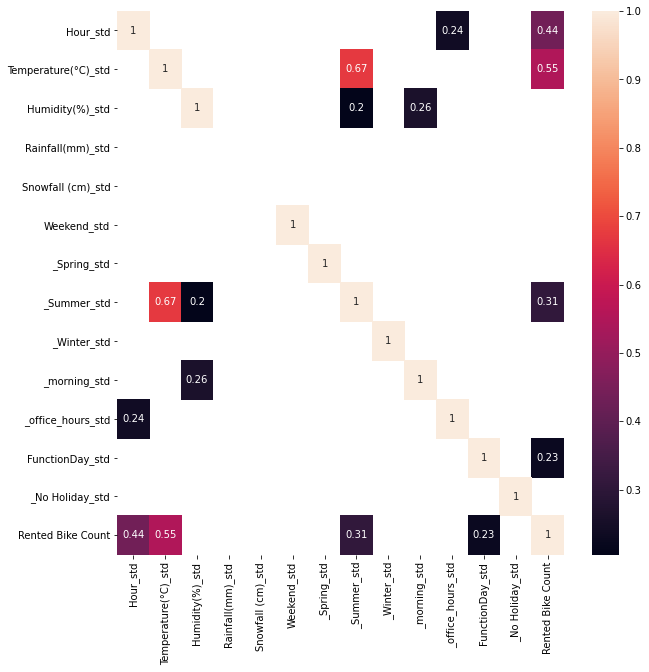

In [95]:
corr = bikeData_feats_e38_std.corr()
corr= corr[corr>0.2]
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)

#### Experiment 9

In [96]:
bikeData_feats_e39_std = bikeData_feats_e38_std.drop(['_Summer_std'],axis=1)

In [97]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e39_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E39",
                                                              "after VIF treatment, removed insignificant\
                                                              removed collenear variable > 0.6",
                                                               result_table_e3_set,0.3,123)
result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Winter_std', '_morning_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


Model_Name Data_Type  \
13  BIKE_LR_STD_VIF_E37_Train     Train   
14   BIKE_LR_STD_VIF_E38_Test      Test   
15  BIKE_LR_STD_VIF_E38_Train     Train   
16   BIKE_LR_STD_VIF_E39_Test      Test   
17  BIKE_LR_STD_VIF_E39_Train     Train   

                                              Remarks  R-squared  \
13                                after VIF treatment   0.561607   
14         after VIF treatment, removed insignificant   0.556166   
15         after VIF treatment, removed insignificant   0.556166   
16  after VIF treatment, removed insignificant    ...   0.552657   
17  after VIF treatment, removed insignificant    ...   0.552657   

    Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
13        0.560482       2.029679  2.922083e-234  4.892964e+16  183056.076100   
14        0.555271       2.031157  9.271279e-276  1.680367e+17  192025.655083   
15        0.555271       2.031157  9.271279e-276  1.680367e+17  185327.872483   
16        0.551838       2.034366  8.075372e-257  2.941511e+18  194166.497084   
17        0.551838       2.034366  8.075372e-257  2.941511e+18  186793.058343   

          RMSE         MAE  
13  427.850530  325.948443  
14  438.207320  331.163604  
15  430.497239  327.446939  
16  440.643276  332.380081  
17  432.195625  329.518721

#### Comparision with other models

In [130]:
bikeData_feats_e32
col_name = bikeData_feats_e32.columns.values.tolist()
nm_chng = {'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour','Temperature(°C)': 'temp',
           'Humidity(%)': 'humidity','Wind speed (m/s)': 'wind_speed','Visibility (10m)': 'visibility',
           'Dew point temperature(°C)': 'dp_temp','Solar Radiation (MJ/m2)': 'solar_rad','Rainfall(mm)': 'rainfall',
           'Snowfall (cm)': 'snowfall', 'Seasons': 'seasons','_No Holiday': 'holiday','FunctionDay': 'func_day'}
bikeData = bikeData_feats_e32.rename(columns = nm_chng)
bikeData.head()

bike_count  hour  temp  humidity  wind_speed  visibility  solar_rad  \
0         254     0  -5.2        37         2.2        2000        0.0   
1         204     1  -5.5        38         0.8        2000        0.0   
2         173     2  -6.0        39         1.0        2000        0.0   
3         107     3  -6.2        40         0.9        2000        0.0   
4          78     4  -6.0        36         2.3        2000        0.0   

   rainfall  snowfall  Weekend  _Spring  _morning  _night  _office_hours  \
0       0.0       0.0        0        0         0       0              0   
1       0.0       0.0        0        0         0       0              0   
2       0.0       0.0        0        0         0       0              0   
3       0.0       0.0        0        0         0       0              0   
4       0.0       0.0        0        0         0       0              0   

   func_day  holiday  
0         1        1  
1         1        1  
2         1        1  
3         1        1  
4         1        1

In [176]:
# Splitting the dataset to Train and Test datasets with 'bike_count'
y = bikeData['bike_count']
X = bikeData.drop('bike_count', axis = 1)

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

### a. Linear regression

In [132]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.5321550654206487


### b. Ridge(L2) Regression

In [133]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : -68.28577643133187
0.5 : -68.26531611884596
0.75 : -68.24502872027384
1.0 : -68.22491140348825
1.25 : -68.20496140520044
1.5 : -68.18517602886405
1.75 : -68.16555264265428
2.0 : -68.14608867751849


In [135]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.5322713214168036


### c. Lasso(L1) Regression:

In [136]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : -68.20063414032
0.5 : -68.13918697139013
0.75 : -68.12102152525196
1.0 : -68.13452032528299
1.25 : -68.27104354499546
1.5 : -68.40481795642542
1.75 : -68.45487278484266
2.0 : -68.57591818611785


In [137]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.09)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.532538474237003


In [138]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test)
mapping['Ridge  Regreesion'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso  Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regreesion : 0.5321550654206487
Ridge  Regreesion : 0.5322713214168036
Lasso  Regression : 0.532538474237003


In [139]:
y_pred = linearModel.predict(X_test)
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value 0.5321550654206487
mean_absolute_error : 338.37223214930924
mean_squared_error :  193178.07118298401
root_mean_squared_error :  439.5202739157592


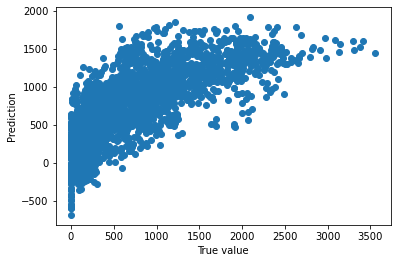

In [140]:
y_pred = linearModel.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

### d. Random Forest Regressor

In [141]:
rc = RandomForestRegressor(n_estimators= 100, criterion= 'mse')
rc.fit(X_train, y_train)
cv = cross_validate(rc, X_train, y_train, cv = 10)
print(cv)

{'fit_time': array([1.39683533, 1.38301468, 1.38597941, 1.39445662, 1.3653841 ,
       1.33937979, 1.41499567, 1.43915129, 1.41007447, 1.35750985]), 'score_time': array([0.0177865 , 0.0199666 , 0.01380324, 0.01931119, 0.01996374,
       0.01982403, 0.02510881, 0.01754022, 0.01945925, 0.01833773]), 'test_score': array([0.90951995, 0.92000197, 0.90395056, 0.90254508, 0.92413947,
       0.90914725, 0.90796238, 0.92345261, 0.93382144, 0.91129881])}


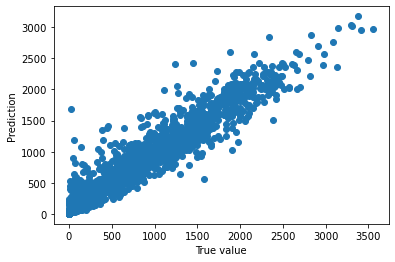

In [142]:
y_pred = rc.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

In [143]:
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value 0.9135153106824826
mean_absolute_error : 119.96156503198294
mean_squared_error :  35710.43359535182
root_mean_squared_error :  188.97204448106027


### e. Grid Search

In [144]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_train,y_train)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.6749381182191883
R-Squaredon test dataset=0.6698933467862366


In [122]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [145]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.1983811631258708
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 40, 'min_samples_split': 10}
